# **New York City Yellow Taxi Data**

## Objective
In this case study you will be learning exploratory data analysis (EDA) with the help of a dataset on yellow taxi rides in New York City. This will enable you to understand why EDA is an important step in the process of data science and machine learning.

## **Problem Statement**
As an analyst at an upcoming taxi operation in NYC, you are tasked to use the 2023 taxi trip data to uncover insights that could help optimise taxi operations. The goal is to analyse patterns in the data that can inform strategic decisions to improve service efficiency, maximise revenue, and enhance passenger experience.

## Tasks
You need to perform the following steps for successfully completing this assignment:
1. Data Loading
2. Data Cleaning
3. Exploratory Analysis: Bivariate and Multivariate
4. Creating Visualisations to Support the Analysis
5. Deriving Insights and Stating Conclusions

---

**NOTE:** The marks given along with headings and sub-headings are cumulative marks for those particular headings/sub-headings.<br>

The actual marks for each task are specified within the tasks themselves.

For example, marks given with heading *2* or sub-heading *2.1* are the cumulative marks, for your reference only. <br>

The marks you will receive for completing tasks are given with the tasks.

Suppose the marks for two tasks are: 3 marks for 2.1.1 and 2 marks for 3.2.2, or
* 2.1.1 [3 marks]
* 3.2.2 [2 marks]

then, you will earn 3 marks for completing task 2.1.1 and 2 marks for completing task 3.2.2.


---

## Data Understanding
The yellow taxi trip records include fields capturing pick-up and drop-off dates/times, pick-up and drop-off locations, trip distances, itemized fares, rate types, payment types, and driver-reported passenger counts.

The data is stored in Parquet format (*.parquet*). The dataset is from 2009 to 2024. However, for this assignment, we will only be using the data from 2023.

The data for each month is present in a different parquet file. You will get twelve files for each of the months in 2023.

The data was collected and provided to the NYC Taxi and Limousine Commission (TLC) by technology providers like vendors and taxi hailing apps. <br>

You can find the link to the TLC trip records page here: https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page

###  Data Description
You can find the data description here: [Data Dictionary](https://www.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf)

**Trip Records**



|Field Name       |description |
|:----------------|:-----------|
| VendorID | A code indicating the TPEP provider that provided the record. <br> 1= Creative Mobile Technologies, LLC; <br> 2= VeriFone Inc. |
| tpep_pickup_datetime | The date and time when the meter was engaged.  |
| tpep_dropoff_datetime | The date and time when the meter was disengaged.   |
| Passenger_count | The number of passengers in the vehicle. <br> This is a driver-entered value. |
| Trip_distance | The elapsed trip distance in miles reported by the taximeter. |
| PULocationID | TLC Taxi Zone in which the taximeter was engaged |
| DOLocationID | TLC Taxi Zone in which the taximeter was disengaged |
|RateCodeID |The final rate code in effect at the end of the trip.<br> 1 = Standard rate <br> 2 = JFK <br> 3 = Newark <br>4 = Nassau or Westchester <br>5 = Negotiated fare <br>6 = Group ride |
|Store_and_fwd_flag |This flag indicates whether the trip record was held in vehicle memory before sending to the vendor, aka “store and forward,” because the vehicle did not have a connection to the server.  <br>Y= store and forward trip <br>N= not a store and forward trip |
|Payment_type| A numeric code signifying how the passenger paid for the trip. <br> 1 = Credit card <br>2 = Cash <br>3 = No charge <br>4 = Dispute <br>5 = Unknown <br>6 = Voided trip |
|Fare_amount| The time-and-distance fare calculated by the meter. <br>Extra Miscellaneous extras and surcharges.  Currently, this only includes the 0.50 and 1 USD rush hour and overnight charges. |
|MTA_tax |0.50 USD MTA tax that is automatically triggered based on the metered rate in use. |
|Improvement_surcharge | 0.30 USD improvement surcharge assessed trips at the flag drop. The improvement surcharge began being levied in 2015. |
|Tip_amount |Tip amount – This field is automatically populated for credit card tips. Cash tips are not included. |
| Tolls_amount | Total amount of all tolls paid in trip.  |
| total_amount | The total amount charged to passengers. Does not include cash tips. |
|Congestion_Surcharge |Total amount collected in trip for NYS congestion surcharge. |
| Airport_fee | 1.25 USD for pick up only at LaGuardia and John F. Kennedy Airports|

Although the amounts of extra charges and taxes applied are specified in the data dictionary, you will see that some cases have different values of these charges in the actual data.

**Taxi Zones**

Each of the trip records contains a field corresponding to the location of the pickup or drop-off of the trip, populated by numbers ranging from 1-263.

These numbers correspond to taxi zones, which may be downloaded as a table or map/shapefile and matched to the trip records using a join.

This is covered in more detail in later sections.

---

## **1** Data Preparation

<font color = red>[5 marks]</font> <br>

### Import Libraries

In [2]:
# Import warnings

import warnings
warnings.simplefilter("ignore")

In [3]:
# Import the libraries you will be using for analysis

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Recommended versions
# numpy version: 1.26.4
# pandas version: 2.2.2
# matplotlib version: 3.10.0
# seaborn version: 0.13.2

# Check versions
print("numpy version:", np.__version__)
print("pandas version:", pd.__version__)
print("matplotlib version:", plt.matplotlib.__version__)
print("seaborn version:", sns.__version__)

numpy version: 1.26.4
pandas version: 2.2.2
matplotlib version: 3.10.0
seaborn version: 0.13.2


### **1.1** Load the dataset
<font color = red>[5 marks]</font> <br>

You will see twelve files, one for each month.

To read parquet files with Pandas, you have to follow a similar syntax as that for CSV files.

`df = pd.read_parquet('file.parquet')`

In [5]:
# Try loading one file

# df = pd.read_parquet('2023-1.parquet')
# df.info()

df = pd.read_parquet('yellow_tripdata_2023-01.parquet')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3066766 entries, 0 to 3066765
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee           

How many rows are there? Do you think handling such a large number of rows is computationally feasible when we have to combine the data for all twelve months into one?

To handle this, we need to sample a fraction of data from each of the files. How to go about that? Think of a way to select only some portion of the data from each month's file that accurately represents the trends.

#### Sampling the Data
> One way is to take a small percentage of entries for pickup in every hour of a date. So, for all the days in a month, we can iterate through the hours and select 5% values randomly from those. Use `tpep_pickup_datetime` for this. Separate date and hour from the datetime values and then for each date, select some fraction of trips for each of the 24 hours.

To sample data, you can use the `sample()` method. Follow this syntax:

```Python
# sampled_data is an empty DF to keep appending sampled data of each hour
# hour_data is the DF of entries for an hour 'X' on a date 'Y'

sample = hour_data.sample(frac = 0.05, random_state = 42)
# sample 0.05 of the hour_data
# random_state is just a seed for sampling, you can define it yourself

sampled_data = pd.concat([sampled_data, sample]) # adding data for this hour to the DF
```

This *sampled_data* will contain 5% values selected at random from each hour.

Note that the code given above is only the part that will be used for sampling and not the complete code required for sampling and combining the data files.

Keep in mind that you sample by date AND hour, not just hour. (Why?)

---

**1.1.1** <font color = red>[5 marks]</font> <br>
Figure out how to sample and combine the files.

**Note:** It is not mandatory to use the method specified above. While sampling, you only need to make sure that your sampled data represents the overall data of all the months accurately.

In [ ]:
# Sample the data
# It is recommmended to not load all the files at once to avoid memory overload

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [7]:
# Take a small percentage of entries from each hour of every date.
# Iterating through the monthly data:
#   read a month file -> day -> hour: append sampled data -> move to next hour -> move to next day after 24 hours -> move to next month file
# Create a single dataframe for the year combining all the monthly data

# Select the folder having data files
import os
# Set the folder containing the NYC Taxi trip record Parquet files
data_dir=os.chdir('C:/Users/Anjali/OneDrive/Desktop/Upgrad_DS/Main Class/NYC/Yellow_Taxi/Trip_Record')

# Create a list of all twelve monthly files to read
file_list = os.listdir()

# Initialize an empty DataFrame to store the final sampled data
df = pd.DataFrame()

# Sampling fraction (5% of each hour's data)
sampling_fraction = 0.05


# Iterate through the list of monthly files
for file_name in file_list:
    try:
        # Get the full file path
        file_path = os.path.join(os.getcwd(), file_name)

        # Read the current month's data
        monthly_data = pd.read_parquet(file_path)

        # Convert datetime column to correct format
        monthly_data["tpep_pickup_datetime"] = pd.to_datetime(monthly_data["tpep_pickup_datetime"])

        # Extract date and hour
        monthly_data["date"] = monthly_data["tpep_pickup_datetime"].dt.date
        monthly_data["hour"] = monthly_data["tpep_pickup_datetime"].dt.hour

        # Initialize an empty DataFrame to store sampled data for the current month
        sampled_month_data = pd.DataFrame()

        # Loop through each unique date in the current month
        for date in monthly_data["date"].unique():
            daily_data = monthly_data[monthly_data["date"] == date]  # Filter data for the specific date

            # Initialize an empty DataFrame for the current day
            sampled_daily_data = pd.DataFrame()

            # Iterate through each hour of the selected date (0 to 23)
            for hour in range(24):
                hour_data = daily_data[daily_data["hour"] == hour]  # Filter data for the hour
                
                if not hour_data.empty:  # Ensure there is data for this hour
                    sample = hour_data.sample(frac=sampling_fraction, random_state=42)  # Sample 5%
                    sampled_daily_data = pd.concat([sampled_daily_data, sample], ignore_index=True)

            # Append the sampled data of the current day to the month's sampled data
            sampled_month_data = pd.concat([sampled_month_data, sampled_daily_data], ignore_index=True)

        # Append the sampled data of the current month to the final dataframe
        df = pd.concat([df, sampled_month_data], ignore_index=True)

        print(f"Processed file: {file_name}")

    except Exception as e:
        print(f"Error reading file {file_name}: {e}")

Processed file: yellow_tripdata_2023-01.parquet
Processed file: yellow_tripdata_2023-02.parquet
Processed file: yellow_tripdata_2023-03.parquet
Processed file: yellow_tripdata_2023-04.parquet
Processed file: yellow_tripdata_2023-05.parquet
Processed file: yellow_tripdata_2023-06.parquet
Processed file: yellow_tripdata_2023-07.parquet
Processed file: yellow_tripdata_2023-08.parquet
Processed file: yellow_tripdata_2023-09.parquet
Processed file: yellow_tripdata_2023-10.parquet
Processed file: yellow_tripdata_2023-11.parquet
Processed file: yellow_tripdata_2023-12.parquet


After combining the data files into one DataFrame, convert the new DataFrame to a CSV or parquet file and store it to use directly.

Ideally, you can try keeping the total entries to around 250,000 to 300,000.

In [10]:
print(f"Total rows after sampling: {len(df)}")

Total rows after sampling: 1915511


In [11]:
# **Ensure the final dataset size is between 250,000 and 300,000**
desired_size = 275000  # Targeting the middle of the range

if len(df) > desired_size:
    df = df.sample(n=desired_size, random_state=42)  # Randomly downsample to 275,000 rows

# Display final DataFrame details
print(f"Final dataset size: {len(df)} rows")
print(df.head())


Final dataset size: 275000 rows
         VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
1595884         2  2023-11-03 17:49:43   2023-11-03 18:01:34              1.0   
1261577         2  2023-09-01 05:34:05   2023-09-01 05:40:17              2.0   
186156          2  2023-02-07 14:47:55   2023-02-07 14:57:34              2.0   
1857034         2  2023-12-18 18:48:36   2023-12-18 19:10:36              1.0   
1796769         2  2023-12-09 07:37:07   2023-12-09 07:41:58              1.0   

         trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
1595884           1.89         1.0                  N           141   
1261577           1.18         1.0                  N           100   
186156            1.81         1.0                  N           142   
1857034           2.79         1.0                  N           163   
1796769           1.23         1.0                  N           229   

         DOLocationID  payment_type  ...  mta_tax  tip

In [12]:
# Store the df in csv/parquet
# df.to_parquet('')
# **Save the final sampled dataset**
df.to_parquet("NYC_Yellow_Taxi_2023_Sampled.parquet", index=False)
print("Sampled dataset saved successfully!")

Sampled dataset saved successfully!


## **2** Data Cleaning
<font color = red>[30 marks]</font> <br>

Now we can load the new data directly.

In [16]:
# Load the new data file
df = pd.read_parquet("NYC_Yellow_Taxi_2023_Sampled.parquet")

In [17]:
# df.head()

df.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-11-03 17:49:43   2023-11-03 18:01:34              1.0   
1         2  2023-09-01 05:34:05   2023-09-01 05:40:17              2.0   
2         2  2023-02-07 14:47:55   2023-02-07 14:57:34              2.0   
3         2  2023-12-18 18:48:36   2023-12-18 19:10:36              1.0   
4         2  2023-12-09 07:37:07   2023-12-09 07:41:58              1.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           1.89         1.0                  N           141           239   
1           1.18         1.0                  N           100           161   
2           1.81         1.0                  N           142            43   
3           2.79         1.0                  N           163           151   
4           1.23         1.0                  N           229           137   

   payment_type  ...  mta_tax  tip_amount  tolls_amount  \
0             1  ...      0.5        3.86           0.0   
1             2  ...      0.5        0.00           0.0   
2             1  ...      0.5        3.22           0.0   
3             2  ...      0.5        0.00           0.0   
4             1  ...      0.5        1.00           0.0   

   improvement_surcharge  total_amount  congestion_surcharge  airport_fee  \
0                    1.0         23.16                   2.5          NaN   
1                    1.0         12.90                   2.5          NaN   
2                    1.0         19.32                   2.5          NaN   
3                    1.0         23.50                   2.5          NaN   
4                    1.0         12.90                   2.5          NaN   

         date  hour Airport_fee  
0  2023-11-03    17         0.0  
1  2023-09-01     5         0.0  
2  2023-02-07    14         0.0  
3  2023-12-18    18         0.0  
4  2023-12-09     7         0.0  

[5 rows x 22 columns]

In [18]:
# df.info()

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 275000 entries, 0 to 274999
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   VendorID               275000 non-null  int64         
 1   tpep_pickup_datetime   275000 non-null  datetime64[us]
 2   tpep_dropoff_datetime  275000 non-null  datetime64[us]
 3   passenger_count        265669 non-null  float64       
 4   trip_distance          275000 non-null  float64       
 5   RatecodeID             265669 non-null  float64       
 6   store_and_fwd_flag     265669 non-null  object        
 7   PULocationID           275000 non-null  int64         
 8   DOLocationID           275000 non-null  int64         
 9   payment_type           275000 non-null  int64         
 10  fare_amount            275000 non-null  float64       
 11  extra                  275000 non-null  float64       
 12  mta_tax                275000 non-null  floa

2.1 Fixing Columns

Fix/drop any columns as you seem necessary in the below sections

In [19]:
#  Drop unnecessary columns (store_and_fwd_flag)
columns_to_drop = ["store_and_fwd_flag"]  
df.drop(columns=columns_to_drop, inplace=True, errors="ignore")

# Rename columns for clarity
df.rename(columns={"tpep_pickup_datetime": "pickup_datetime", "tpep_dropoff_datetime": "dropoff_datetime"}, inplace=True)

Check for missing values
missing_values = df.isnull().sum()
print("\nMissing Values Before Handling:")
print(missing_values[missing_values > 0])



Missing Values Before Handling:
passenger_count           9331
RatecodeID                9331
congestion_surcharge      9331
airport_fee             253657
Airport_fee              30674
dtype: int64


In [23]:
#Drop or fill missing values (Example: Filling missing passenger_count with median)
df["passenger_count"].fillna(df["passenger_count"].median(), inplace=True)
df["RatecodeID"].fillna(df["RatecodeID"].median(), inplace=True)
df["congestion_surcharge"].fillna(df["congestion_surcharge"].median(), inplace=True)

#Convert categorical columns to appropriate types
df["payment_type"] = df["payment_type"].astype("category")

print(df.info())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 275000 entries, 0 to 274999
Data columns (total 21 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   VendorID               275000 non-null  int64         
 1   pickup_datetime        275000 non-null  datetime64[us]
 2   dropoff_datetime       275000 non-null  datetime64[us]
 3   passenger_count        275000 non-null  float64       
 4   trip_distance          275000 non-null  float64       
 5   RatecodeID             275000 non-null  float64       
 6   PULocationID           275000 non-null  int64         
 7   DOLocationID           275000 non-null  int64         
 8   payment_type           275000 non-null  category      
 9   fare_amount            275000 non-null  float64       
 10  extra                  275000 non-null  float64       
 11  mta_tax                275000 non-null  float64       
 12  tip_amount             275000 non-null  floa

In [24]:
# Save cleaned data (optional)
df.to_parquet("NYC_Yellow_Taxi_2023_Cleaned.parquet", index=False)
print("\nColumn Fixing Completed. Cleaned dataset saved successfully!")


Column Fixing Completed. Cleaned dataset saved successfully!


**2.1.1** <font color = red>[2 marks]</font> <br>

Fix the index and drop unnecessary columns

In [27]:
# Fix the index and drop any columns that are not needed
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 275000 entries, 0 to 274999
Data columns (total 21 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   VendorID               275000 non-null  int64         
 1   pickup_datetime        275000 non-null  datetime64[us]
 2   dropoff_datetime       275000 non-null  datetime64[us]
 3   passenger_count        275000 non-null  float64       
 4   trip_distance          275000 non-null  float64       
 5   RatecodeID             275000 non-null  float64       
 6   PULocationID           275000 non-null  int64         
 7   DOLocationID           275000 non-null  int64         
 8   payment_type           275000 non-null  category      
 9   fare_amount            275000 non-null  float64       
 10  extra                  275000 non-null  float64       
 11  mta_tax                275000 non-null  float64       
 12  tip_amount             275000 non-null  floa

In [28]:

columns_to_drop = ["extra"]
df.drop(columns=columns_to_drop, inplace=True, errors="ignore")

# Display DataFrame info after changes
print("\nAfter Fixing Index & Dropping Columns:")
print(df.info())

# Save the updated dataset
df.to_parquet("NYC_Yellow_Taxi_2023_Cleaned.parquet", index=False)

print("\nIndex Fixed & Unnecessary Columns Dropped. Cleaned dataset saved!")


After Fixing Index & Dropping Columns:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 275000 entries, 0 to 274999
Data columns (total 20 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   VendorID               275000 non-null  int64         
 1   pickup_datetime        275000 non-null  datetime64[us]
 2   dropoff_datetime       275000 non-null  datetime64[us]
 3   passenger_count        275000 non-null  float64       
 4   trip_distance          275000 non-null  float64       
 5   RatecodeID             275000 non-null  float64       
 6   PULocationID           275000 non-null  int64         
 7   DOLocationID           275000 non-null  int64         
 8   payment_type           275000 non-null  category      
 9   fare_amount            275000 non-null  float64       
 10  mta_tax                275000 non-null  float64       
 11  tip_amount             275000 non-null  float64       
 12  toll

**2.1.2** <font color = red>[3 marks]</font> <br>
There are two airport fee columns. This is possibly an error in naming columns. Let's see whether these can be combined into a single column.

In [ ]:
# Combine the two airport fee columns


In [37]:
# Load the cleaned dataset
df = pd.read_parquet("NYC_Yellow_Taxi_2023_Cleaned.parquet")

# Identify columns with "airport fee" in their name
airport_fee_cols = [col for col in df.columns if "airport_fee" in col.lower()]
print(f"Identified Airport Fee Columns: {airport_fee_cols}")

# Check if both columns have identical values
if len(airport_fee_cols) == 2:
    col1, col2 = airport_fee_cols
    
    # Compare the two columns
    same_values = (df[col1] == df[col2]).all()
    print(f"Are both columns identical? {same_values}")

    if same_values:
        # Drop one column if they are identical
        df.drop(columns=[col2], inplace=True)
        df.rename(columns={col1: "airport_fee"}, inplace=True)
    else:
        # Combine by taking the maximum (assuming missing values or discrepancies)
        df["airport_fee"] = df[airport_fee_cols].max(axis=1)

        # Drop the original columns
        df.drop(columns=airport_fee_cols, inplace=True)

# Save the updated dataset
df.to_parquet("NYC_Yellow_Taxi_2023_Cleaned.parquet", index=False)


print("\nAirport fee columns combined successfully!")



Identified Airport Fee Columns: []

Airport fee columns combined successfully!


**2.1.3** <font color = red>[5 marks]</font> <br>
Fix columns with negative (monetary) values

In [ ]:
# check where values of fare amount are negative


In [39]:


# 1. Identify monetary columns
monetary_columns = ["fare_amount", "mta_tax", "tip_amount", "tolls_amount", "improvement_surcharge", "total_amount"]

# 2. Check for negative values in these columns
negative_values = df[monetary_columns].lt(0).sum()
print("Negative Value Counts per Column:\n", negative_values)


Negative Value Counts per Column:
 fare_amount              2826
mta_tax                  2683
tip_amount                 12
tolls_amount              190
improvement_surcharge    2778
total_amount             2779
dtype: int64


In [42]:
#Remove rows where `fare_amount` or `total_amount` is negative 
df = df[(df["fare_amount"] >= 0) & (df["total_amount"] >= 0)]
#For other monetary columns (if any negative values exist), replace them with absolute values or median
for col in monetary_columns:
    df[col] = df[col].abs()  # Convert negatives to positive values (if they make sense)
    df.to_parquet("NYC_Yellow_Taxi_2023_Cleaned.parquet", index=False)

print("\nNegative monetary values have been fixed successfully!")


Negative monetary values have been fixed successfully!


Did you notice something different in the `RatecodeID` column for above records?

In [ ]:
# Analyse RatecodeID for the negative fare amounts


In [43]:
negative_fares = df[df["fare_amount"] < 0]

# Count occurrences of each `RatecodeID` in negative fares
ratecode_analysis = negative_fares["RatecodeID"].value_counts()

# Display the results
print("RatecodeID Distribution for Negative Fare Amounts:\n", ratecode_analysis)

RatecodeID Distribution for Negative Fare Amounts:
 Series([], Name: count, dtype: int64)


In [ ]:
# Find which columns have negative values



In [44]:
# Select only numeric columns (since negative values don't apply to categorical data)
numeric_columns = df.select_dtypes(include=["int64", "float64"])

# Identify columns with negative values
negative_value_counts = (numeric_columns < 0).sum()

# Filter out columns that actually have negative values
negative_columns = negative_value_counts[negative_value_counts > 0]

# Display results
print("Columns with Negative Values and Their Counts:\n", negative_columns)

Columns with Negative Values and Their Counts:
 Series([], dtype: int64)


In [ ]:
# fix these negative values


### **2.2** Handling Missing Values
<font color = red>[10 marks]</font> <br>

**2.2.1**  <font color = red>[2 marks]</font> <br>
Find the proportion of missing values in each column




In [ ]:
# Find the proportion of missing values in each column



In [45]:
# Calculate missing value proportions
missing_values = df.isnull().sum() / len(df) * 100  # Convert to percentage

# Filter out columns with no missing values
missing_values = missing_values[missing_values > 0].sort_values(ascending=False)

# Display results
print("Proportion of Missing Values in Each Column:\n", missing_values)

Proportion of Missing Values in Each Column:
 Series([], dtype: float64)


**2.2.2**  <font color = red>[3 marks]</font> <br>
Handling missing values in `passenger_count`

In [ ]:
# Display the rows with null values
# Impute NaN values in 'passenger_count'


In [48]:
missing_passenger_count = df["passenger_count"].isnull().sum()
print(f"Missing values in 'passenger_count': {missing_passenger_count}")


Missing values in 'passenger_count': 0


Did you find zeroes in passenger_count? Handle these.

In [52]:

df.loc[df["passenger_count"] == 0, "passenger_count"] = df["passenger_count"].median()
df = df[df["passenger_count"] > 0]
zero_passenger_count_after = (df["passenger_count"] == 0).sum()
print(f"Remaining trips with passenger_count = 0: {zero_passenger_count_after}")



Remaining trips with passenger_count = 0: 0


**2.2.3**  <font color = red>[2 marks]</font> <br>
Handle missing values in `RatecodeID`

In [ ]:
# Fix missing values in 'RatecodeID'


In [60]:
# Count missing values in RatecodeID
missing_ratecode = df["RatecodeID"].isnull().sum()
print(f"Missing values in 'RatecodeID': {missing_ratecode}")
# Display RatecodeID value counts
print(df["RatecodeID"].value_counts())




Missing values in 'RatecodeID': 0
RatecodeID
1.0     257611
2.0      10078
5.0       1565
99.0      1459
3.0        889
4.0        561
Name: count, dtype: int64


In [61]:
most_common_ratecode = df["RatecodeID"].mode()[0]
df["RatecodeID"].fillna(most_common_ratecode, inplace=True)
df.dropna(subset=["RatecodeID"], inplace=True)
# Check if missing values are handled
print(f"Remaining missing values in 'RatecodeID': {df['RatecodeID'].isnull().sum()}")



Remaining missing values in 'RatecodeID': 0


2.2.4
Impute NaN in `congestion_surcharge`

In [ ]:
# handle null values in congestion_surcharge


In [62]:
missing_congestion = df["congestion_surcharge"].isnull().sum()
print(f"Missing values in 'congestion_surcharge': {missing_congestion}")

Missing values in 'congestion_surcharge': 0


Are there missing values in other columns? Did you find NaN values in some other set of columns? Handle those missing values below.

In [ ]:
# Handle any remaining missing values



In [64]:
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100

# Display columns with missing values
missing_data = pd.DataFrame({"Missing Values": missing_values, "Percentage": missing_percentage})
missing_data = missing_data[missing_data["Missing Values"] > 0]  # Filter only columns with missing values

print(missing_data.sort_values(by="Percentage", ascending=False))
print(df.isnull().sum().sum())

Empty DataFrame
Columns: [Missing Values, Percentage]
Index: []
0


### **2.3** Handling Outliers
<font color = red>[10 marks]</font> <br>

Before we start fixing outliers, let's perform outlier analysis.

In [65]:
# Describe the data and check if there are any potential outliers present
# Check for potential out of place values in various columns

df.describe().T

count                        mean  \
VendorID               272163.0                    1.733895   
pickup_datetime          272163  2023-07-03 07:17:15.255229   
dropoff_datetime         272163  2023-07-03 07:34:28.618854   
passenger_count        272163.0                    1.371443   
trip_distance          272163.0                    4.163126   
RatecodeID             272163.0                    1.598101   
PULocationID           272163.0                  165.439369   
DOLocationID           272163.0                  164.197771   
payment_type           272163.0                    1.163262   
fare_amount            272163.0                   19.806583   
mta_tax                272163.0                    0.495194   
tip_amount             272163.0                    3.548205   
tolls_amount           272163.0                    0.597213   
improvement_surcharge  272163.0                    0.998991   
total_amount           272163.0                   28.871937   
congestion_surcharge   272163.0                    2.313645   
hour                   272163.0                   14.257335   

                                       min                         25%  \
VendorID                               1.0                         1.0   
pickup_datetime        2023-01-01 00:05:08  2023-04-03 09:03:35.500000   
dropoff_datetime       2023-01-01 00:08:29         2023-04-03 09:20:21   
passenger_count                        1.0                         1.0   
trip_distance                          0.0                        1.04   
RatecodeID                             1.0                         1.0   
PULocationID                           1.0                       132.0   
DOLocationID                           1.0                       114.0   
payment_type                           0.0                         1.0   
fare_amount                            0.0                         9.3   
mta_tax                                0.0                         0.5   
tip_amount                             0.0                         1.0   
tolls_amount                           0.0                         0.0   
improvement_surcharge                  0.0                         1.0   
total_amount                           0.0                       15.96   
congestion_surcharge                   0.0                         2.5   
hour                                   0.0                        11.0   

                                       50%                         75%  \
VendorID                               2.0                         2.0   
pickup_datetime        2023-06-28 12:29:29         2023-10-07 00:13:30   
dropoff_datetime       2023-06-28 12:45:53  2023-10-07 00:27:34.500000   
passenger_count                        1.0                         1.0   
trip_distance                         1.78                         3.4   
RatecodeID                             1.0                         1.0   
PULocationID                         162.0                       234.0   
DOLocationID                         162.0                       234.0   
payment_type                           1.0                         1.0   
fare_amount                           13.5                        21.9   
mta_tax                                0.5                         0.5   
tip_amount                            2.85                        4.42   
tolls_amount                           0.0                         0.0   
improvement_surcharge                  1.0                         1.0   
total_amount                          21.0                        30.8   
congestion_surcharge                   2.5                         2.5   
hour                                  15.0                        19.0   

                                       max        std  
VendorID                               6.0   0.447375  
pickup_datetime        2023-12-31 23:56:33        NaN  
dropoff_datetime       2024-01-01 00:17:46        NaN  
p

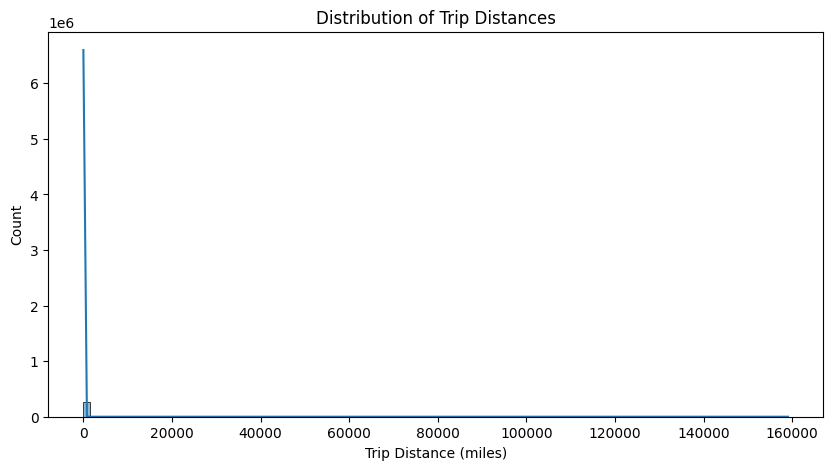

In [68]:
monetary_columns = ["fare_amount", "total_amount", "tip_amount", "tolls_amount", "mta_tax", "congestion_surcharge"]

plt.figure(figsize=(12, 6))
sns.boxplot(data=df[monetary_columns])
plt.xticks(rotation=45)
plt.title("Boxplot of Monetary Columns to Identify Outliers")
plt.show()

plt.figure(figsize=(10, 5))
sns.histplot(df["trip_distance"], bins=100, kde=True)
plt.title("Distribution of Trip Distances")
plt.xlabel("Trip Distance (miles)")
plt.ylabel("Count")
plt.show()


sns.boxplot(x=df["passenger_count"])
plt.title("Passenger Count Outlier Analysis")
plt.show()


**2.3.1**  <font color = red>[10 marks]</font> <br>
Based on the above analysis, it seems that some of the outliers are present due to errors in registering the trips. Fix the outliers.

Some points you can look for:
- Entries where `trip_distance` is nearly 0 and `fare_amount` is more than 300
- Entries where `trip_distance` and `fare_amount` are 0 but the pickup and dropoff zones are different (both distance and fare should not be zero for different zones)
- Entries where `trip_distance` is more than 250  miles.
- Entries where `payment_type` is 0 (there is no payment_type 0 defined in the data dictionary)

These are just some suggestions. You can handle outliers in any way you wish, using the insights from above outlier analysis.

How will you fix each of these values? Which ones will you drop and which ones will you replace?

First, let us remove 7+ passenger counts as there are very less instances.

In [69]:
# remove passenger_count > 6

df = df[df["passenger_count"] <= 6]
df = df[(df["passenger_count"] > 0) & (df["passenger_count"] <= 6)]

In [73]:
# Continue with outlier handling

df = df[(df["trip_distance"] > 0) & (df["trip_distance"] <= 50)]
df = df[df["fare_amount"] > 0]
df = df[df["total_amount"] > 0]
fare_cap = df["fare_amount"].quantile(0.99)
df = df[df["fare_amount"] <= fare_cap]



In [72]:


df = df[~((df["trip_distance"] < 0.1) & (df["fare_amount"] > 300))]
df = df[~((df["trip_distance"] == 0) & (df["fare_amount"] == 0) & (df["PULocationID"] != df["DOLocationID"]))]
df = df[df["trip_distance"] <= 250]
df = df[df["payment_type"] != 0]
df = df[(df["fare_amount"] >= 0) | (df["RatecodeID"] == 4)]
fare_cap = df["fare_amount"].quantile(0.99)
df = df[df["fare_amount"] <= fare_cap]
print(df.describe().T) 


                          count                        mean  \
VendorID               255666.0                     1.73817   
pickup_datetime          255666  2023-07-02 05:02:18.843377   
dropoff_datetime         255666  2023-07-02 05:19:03.486016   
passenger_count        255666.0                    1.382828   
trip_distance          255666.0                    3.237375   
RatecodeID             255666.0                    1.533951   
PULocationID           255666.0                  165.920592   
DOLocationID           255666.0                  164.944697   
payment_type           255666.0                    1.197856   
fare_amount            255666.0                   18.504324   
mta_tax                255666.0                    0.499238   
tip_amount             255666.0                    3.429491   
tolls_amount           255666.0                    0.497512   
improvement_surcharge  255666.0                    0.999638   
total_amount           255666.0                   27.41

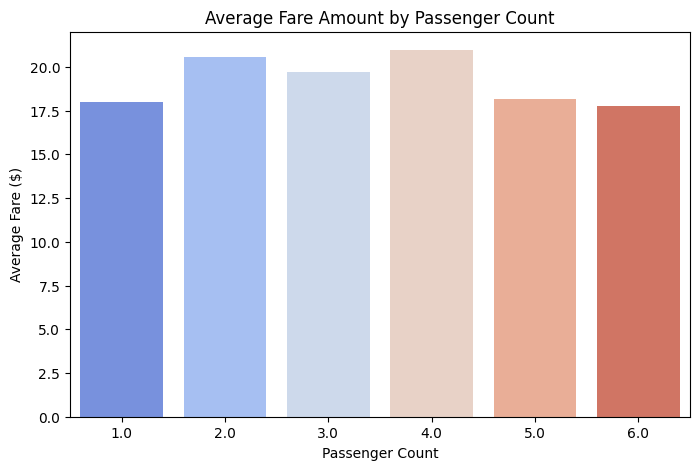

In [74]:
df_grouped = df.groupby("passenger_count")["fare_amount"].mean().reset_index()

plt.figure(figsize=(8, 5))
sns.barplot(x="passenger_count", y="fare_amount", data=df_grouped, palette="coolwarm")
plt.xlabel("Passenger Count")
plt.ylabel("Average Fare ($)")
plt.title("Average Fare Amount by Passenger Count")
plt.show()


In [75]:
df_grouped = df.groupby("passenger_count")["trip_distance"].mean().reset_index()

plt.figure(figsize=(8, 5))
sns.barplot(x="passenger_count", y="trip_distance", data=df_grouped, palette="magma")
plt.xlabel("Passenger Count")
plt.ylabel("Average Trip Distance (miles)")
plt.title("Average Trip Distance by Passenger Count")
plt.show()


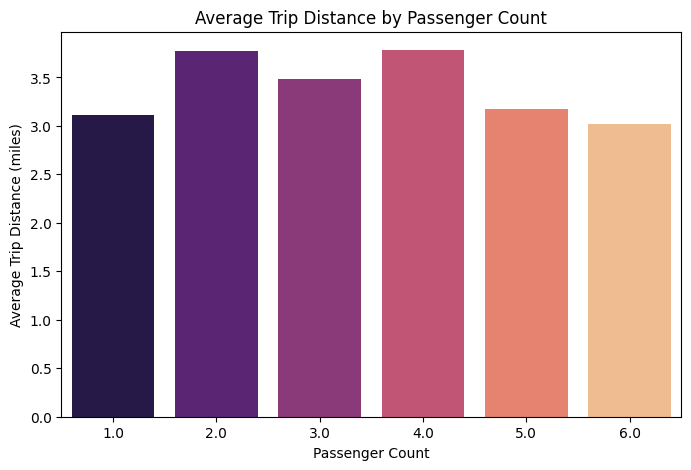

In [77]:
df_grouped = df.groupby("passenger_count")["trip_distance"].mean().reset_index()

plt.figure(figsize=(8, 5))
sns.barplot(x="passenger_count", y="trip_distance", data=df_grouped, palette="magma")
plt.xlabel("Passenger Count")
plt.ylabel("Average Trip Distance (miles)")
plt.title("Average Trip Distance by Passenger Count")
plt.show()

In [85]:
# Do any columns need standardising?

#pickup_datetime and dropoff_datetime to Datetime Format

df["pickup_datetime"] = pd.to_datetime(df["pickup_datetime"])
df["dropoff_datetime"] = pd.to_datetime(df["dropoff_datetime"])

#RatecodeID is numeric but represents categories.
    
ratecode_mapping = {
    1: "Standard Rate",
    2: "JFK",
    3: "Newark",
    4: "Nassau/Westchester",
    5: "Negotiated Fare",
    6: "Group Ride"
}
df["RatecodeID"] = df["RatecodeID"].map(ratecode_mapping).astype("category")

# payment_type is stored as numbers instead of labels.

payment_mapping = {
    1: "Credit Card",
    2: "Cash",
    3: "No Charge",
    4: "Dispute",
    5: "Unknown",
    6: "Voided Trip"
}
df["payment_type"] = df["payment_type"].map(payment_mapping).astype("category")

#Columns representing monetary values should be float, but they may contain string types or errors.

monetary_columns = [
    "fare_amount", "mta_tax", "tip_amount",
    "tolls_amount", "improvement_surcharge", "total_amount"
]
df[monetary_columns] = df[monetary_columns].astype(float)

#passenger_count should be a whole number (integer).
df["passenger_count"] = df["passenger_count"].astype(int)



## **3** Exploratory Data Analysis
<font color = red>[90 marks]</font> <br>

In [86]:
df.columns.tolist()

['VendorID',
 'pickup_datetime',
 'dropoff_datetime',
 'passenger_count',
 'trip_distance',
 'RatecodeID',
 'PULocationID',
 'DOLocationID',
 'payment_type',
 'fare_amount',
 'mta_tax',
 'tip_amount',
 'tolls_amount',
 'improvement_surcharge',
 'total_amount',
 'congestion_surcharge',
 'date',
 'hour']

#### **3.1** General EDA: Finding Patterns and Trends
<font color = red>[40 marks]</font> <br>

**3.1.1** <font color = red>[3 marks]</font> <br>
Categorise the varaibles into Numerical or Categorical.
* `VendorID`:
* `tpep_pickup_datetime`:
* `tpep_dropoff_datetime`:
* `passenger_count`:
* `trip_distance`:
* `RatecodeID`:
* `PULocationID`:
* `DOLocationID`:
* `payment_type`:
* `pickup_hour`:
* `trip_duration`:


The following monetary parameters belong in the same category, is it categorical or numerical?


* `fare_amount`
* `extra`
* `mta_tax`
* `tip_amount`
* `tolls_amount`
* `improvement_surcharge`
* `total_amount`
* `congestion_surcharge`
* `airport_fee`

In [ ]:

VendorID	            Categorical
tpep_pickup_datetime	Datetime
tpep_dropoff_datetime	Datetime
passenger_count	        Numerical (Discrete)
trip_distance	        Numerical (Continuous)
RatecodeID	            Categorical
PULocationID	        Categorical
DOLocationID	        Categorical
payment_type	        Categorical
pickup_hour	            Numerical (Discrete)
trip_duration	        Numerical (Continuous)



Monetary Columns: Categorical or Numerical?
All these columns represent dollar amounts and should be Numerical (Continuous):

Numerical (Continuous)

fare_amount
extra
mta_tax
tip_amount
tolls_amount
improvement_surcharge
total_amount
congestion_surcharge
airport_fee



##### Temporal Analysis

**3.1.2** <font color = red>[5 marks]</font> <br>
Analyse the distribution of taxi pickups by hours, days of the week, and months.

In [ ]:
# Find and show the hourly trends in taxi pickups



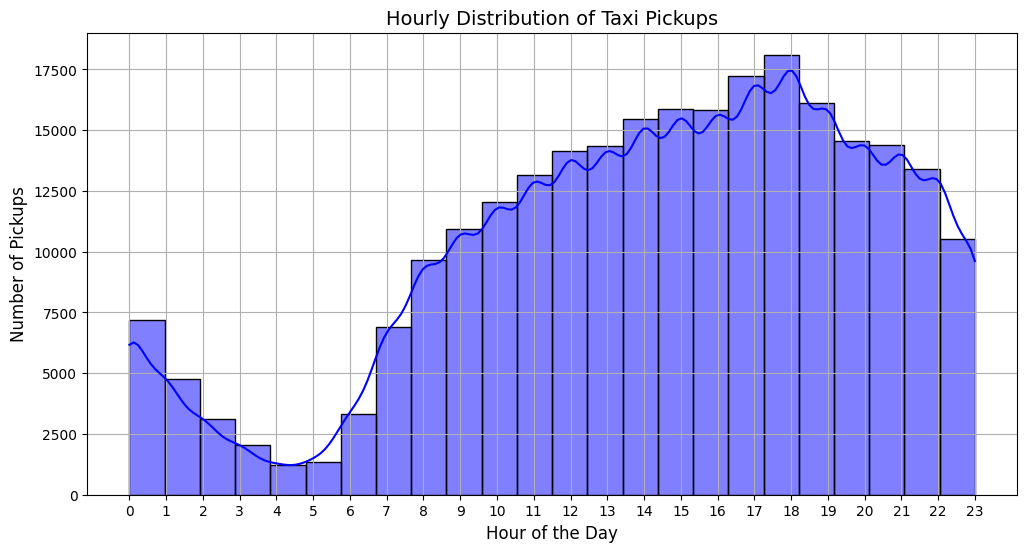

In [87]:
# Extract hour from pickup datetime
df["pickup_hour"] = df["pickup_datetime"].dt.hour  

# Plot hourly trends
plt.figure(figsize=(12, 6))
sns.histplot(df["pickup_hour"], bins=24, kde=True, color="blue")

plt.title("Hourly Distribution of Taxi Pickups", fontsize=14)
plt.xlabel("Hour of the Day", fontsize=12)
plt.ylabel("Number of Pickups", fontsize=12)
plt.xticks(range(0, 24))
plt.grid(True)
plt.show()


In [ ]:
# Find and show the daily trends in taxi pickups (days of the week)


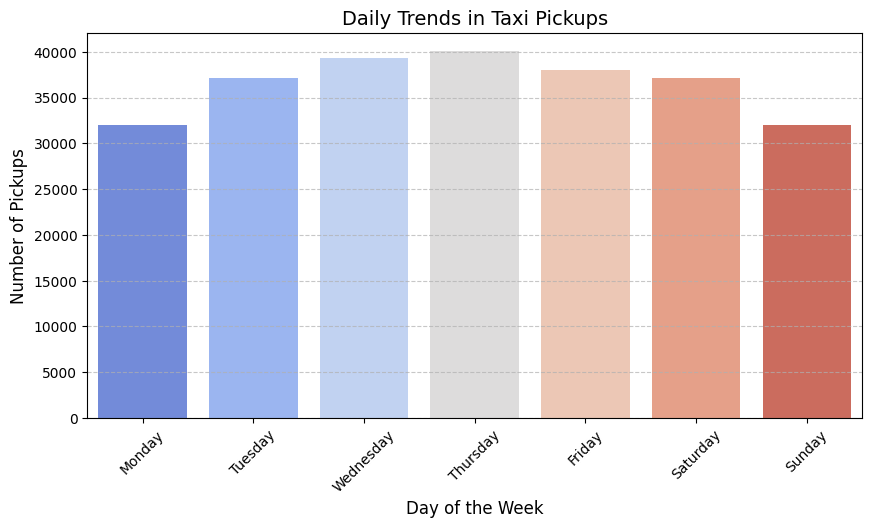

In [88]:
# Extract day of the week from pickup datetime
df["pickup_day"] = df["pickup_datetime"].dt.day_name()

# Order days properly for visualization
day_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

# Plot the daily trends
plt.figure(figsize=(10, 5))
sns.countplot(x="pickup_day", data=df, order=day_order, palette="coolwarm")

# Customize the chart
plt.title("Daily Trends in Taxi Pickups", fontsize=14)
plt.xlabel("Day of the Week", fontsize=12)
plt.ylabel("Number of Pickups", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

In [ ]:
# Show the monthly trends in pickups

In [89]:
# Extract month from pickup datetime
df["pickup_month"] = df["pickup_datetime"].dt.month_name()

# Order months properly
month_order = ["January", "February", "March", "April", "May", "June", 
               "July", "August", "September", "October", "November", "December"]

# Plot the monthly trends
plt.figure(figsize=(12, 6))
sns.countplot(x="pickup_month", data=df, order=month_order, palette="viridis")

# Customize the chart
plt.title("Monthly Trends in NYC Taxi Pickups", fontsize=14)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Number of Pickups", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

##### Financial Analysis

Take a look at the financial parameters like `fare_amount`, `tip_amount`, `total_amount`, and also `trip_distance`. Do these contain zero/negative values?

In [ ]:
# Analyse the above parameters

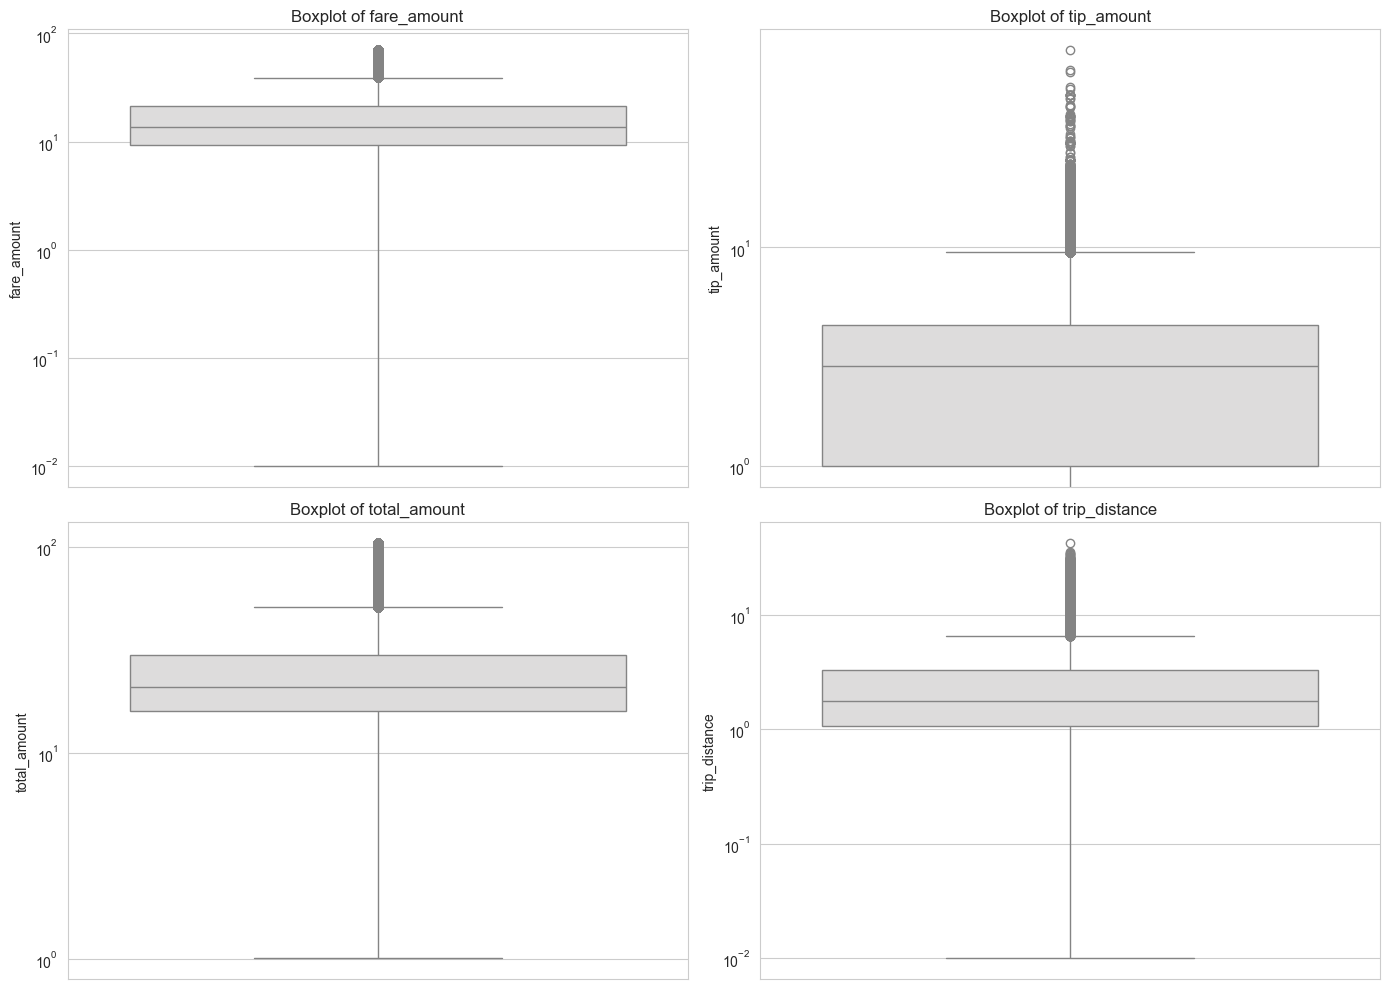

In [91]:
sns.set_style("whitegrid")

# Plot distribution of financial parameters
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

for i, col in enumerate(financial_columns):
    sns.boxplot(y=df[col], ax=axes[i//2, i%2], palette="coolwarm")
    axes[i//2, i%2].set_title(f"Boxplot of {col}")
    axes[i//2, i%2].set_yscale("log")  # Use log scale to handle outliers better

plt.tight_layout()
plt.show()

Do you think it is beneficial to create a copy DataFrame leaving out the zero values from these?

In [ ]:
Yes, creating a copy of the DataFrame that excludes zero values for financial and distance-related fields can be highly beneficial for analysis.

**3.1.3** <font color = red>[2 marks]</font> <br>
Filter out the zero values from the above columns.

**Note:** The distance might be 0 in cases where pickup and drop is in the same zone. Do you think it is suitable to drop such cases of zero distance?

In [94]:
# Create a df with non zero entries for the selected parameters.

# Create a filtered DataFrame where financial fields and trip distance are > 0
df_filtered = df[
    (df["fare_amount"] > 0) &
    (df["total_amount"] > 0) &
    (df["trip_distance"] > 0)
].copy()

# Display summary of removed rows
print(f"Original DataFrame: {df.shape[0]} rows")
print(f"Filtered DataFrame: {df_filtered.shape[0]} rows")
print(f"Rows removed: {df.shape[0] - df_filtered.shape[0]}")


# Check how many zero-distance trips have non-zero fare
zero_distance_fare = df[(df["trip_distance"] == 0) & (df["fare_amount"] > 0)]
print(f"Zero distance trips with non-zero fare: {zero_distance_fare.shape[0]}")




Original DataFrame: 255666 rows
Filtered DataFrame: 255666 rows
Rows removed: 0
Zero distance trips with non-zero fare: 0


**3.1.4** <font color = red>[3 marks]</font> <br>
Analyse the monthly revenue (`total_amount`) trend

In [ ]:
# Group data by month and analyse monthly revenue


In [97]:
# Extract month from pickup datetime
df_filtered["month"] = df_filtered["pickup_datetime"].dt.month

# Group by month and compute total revenue
monthly_revenue = df_filtered.groupby("month")["total_amount"].sum().reset_index()

# Rename columns for clarity
monthly_revenue.columns = ["Month", "Total Revenue ($)"]

# Display monthly revenue
print(monthly_revenue)

# Sort by month for proper visualization
monthly_revenue = monthly_revenue.sort_values("Month")

# Visualize the revenue trend
plt.figure(figsize=(10,5))
sns.barplot(x=monthly_revenue["Month"], y=monthly_revenue["Total Revenue ($)"], palette="Blues_r")

# Labels and title
plt.xticks(ticks=range(0,12), labels=["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
plt.xlabel("Month")
plt.ylabel("Total Revenue ($)")
plt.title("Monthly Revenue Analysis (NYC Yellow Taxi - 2023)")
plt.grid(axis="y")
plt.show()


    Month  Total Revenue ($)
0       1          541008.61
1       2          505692.02
2       3          624603.45
3       4          602854.38
4       5          649857.53
5       6          614944.22
6       7          539959.60
7       8          515832.02
8       9          530329.67
9      10          649798.24
10     11          613895.43
11     12          620366.81


**3.1.5** <font color = red>[3 marks]</font> <br>
Show the proportion of each quarter of the year in the revenue

In [ ]:
# Calculate proportion of each quarter


   Quarter  Total Revenue ($)  Revenue Share (%)
0        1         1671304.08          23.844632
1        2         1867656.13          26.646002
2        3         1586121.29          22.629322
3        4         1884060.48          26.880044


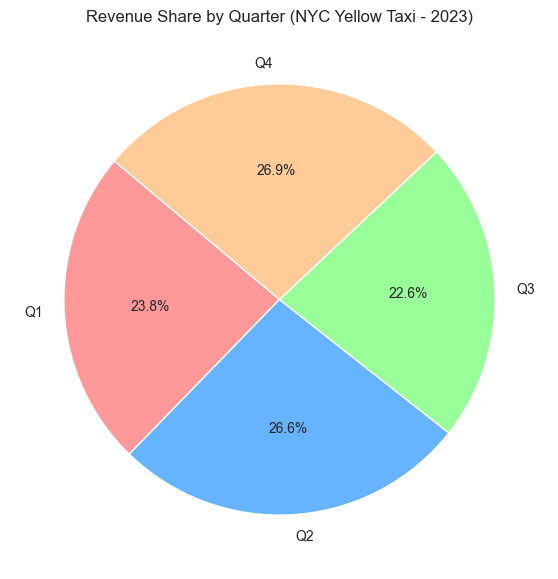

In [100]:
import matplotlib.pyplot as plt

# Ensure the datetime column is in proper format
df_filtered["pickup_datetime"] = pd.to_datetime(df_filtered["pickup_datetime"])

# Extract the quarter from pickup datetime
df_filtered["quarter"] =df_filtered["pickup_datetime"].dt.quarter

# Group by quarter and compute total revenue
quarterly_revenue = df_filtered.groupby("quarter")["total_amount"].sum().reset_index()

# Calculate the total annual revenue
total_revenue = quarterly_revenue["total_amount"].sum()

# Add a percentage column
quarterly_revenue["Revenue Share (%)"] = (quarterly_revenue["total_amount"] / total_revenue) * 100

# Rename columns for clarity
quarterly_revenue.columns = ["Quarter", "Total Revenue ($)", "Revenue Share (%)"]

# Display the quarterly revenue proportions
print(quarterly_revenue)

# Plot the revenue share as a pie chart
plt.figure(figsize=(7,7))
plt.pie(quarterly_revenue["Revenue Share (%)"], labels=["Q1", "Q2", "Q3", "Q4"], 
        autopct="%1.1f%%", colors=["#ff9999","#66b3ff","#99ff99","#ffcc99"], startangle=140)

# Title
plt.title("Revenue Share by Quarter (NYC Yellow Taxi - 2023)")

# Show the pie chart
plt.show()


**3.1.6** <font color = red>[3 marks]</font> <br>
Visualise the relationship between `trip_distance` and `fare_amount`. Also find the correlation value for these two.

**Hint:** You can leave out the trips with trip_distance = 0

In [ ]:
# Show how trip fare is affected by distance


Correlation between trip distance and fare amount: 0.9533


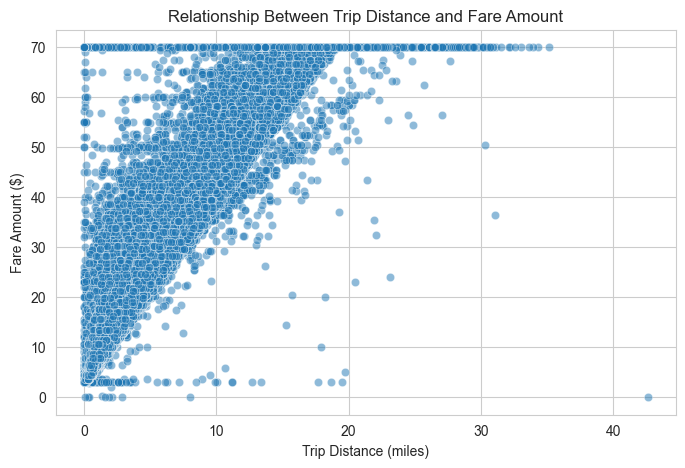

In [102]:
# Filter out trips with zero trip distance
df_valid = df_filtered[df_filtered["trip_distance"] > 0]

# Compute correlation
correlation = df_valid["trip_distance"].corr(df_valid["fare_amount"])
print(f"Correlation between trip distance and fare amount: {correlation:.4f}")

# Plot scatter plot to visualize the relationship
plt.figure(figsize=(8,5))
sns.scatterplot(x=df_valid["trip_distance"], y=df_valid["fare_amount"], alpha=0.5)

# Labels and title
plt.xlabel("Trip Distance (miles)")
plt.ylabel("Fare Amount ($)")
plt.title("Relationship Between Trip Distance and Fare Amount")

# Show the plot
plt.show()


**3.1.7** <font color = red>[5 marks]</font> <br>
Find and visualise the correlation between:
1. `fare_amount` and trip duration (pickup time to dropoff time)
2. `fare_amount` and `passenger_count`
3. `tip_amount` and `trip_distance`

In [ ]:
# Show relationship between fare and trip duration

In [106]:

# Ensure datetime columns are in proper format
df_filtered["pickup_datetime"] = pd.to_datetime(df_filtered["pickup_datetime"])
df_filtered["dropoff_datetime"] = pd.to_datetime(df_filtered["dropoff_datetime"])

# Calculate trip duration in minutes
df_filtered["trip_duration"] = (df_filtered["dropoff_datetime"] - df_filtered["pickup_datetime"]).dt.total_seconds() / 60

# Remove trips with 0 or negative duration
df_valid = df_filtered[df_filtered["trip_duration"] > 0]

# Compute correlation
correlation = df_valid["fare_amount"].corr(df_valid["trip_duration"])
print(f"Correlation between fare amount and trip duration: {correlation:.4f}")

# Plot scatter plot to visualize the relationship
plt.figure(figsize=(8,5))
sns.scatterplot(x=df_valid["trip_duration"], y=df_valid["fare_amount"], alpha=0.5)

# Labels and title
plt.xlabel("Trip Duration (minutes)")
plt.ylabel("Fare Amount ($)")
plt.title("Relationship Between Trip Duration and Fare Amount")
plt.show()


Correlation between fare amount and trip duration: 0.2951


In [ ]:
# Show relationship between fare and number of passengers


In [108]:
# Remove entries with zero or negative fare amounts
df_valid = df_filtered[df_filtered["fare_amount"] > 0]

# Aggregate data: Average fare per passenger count
avg_fare_per_passenger = df_valid.groupby("passenger_count")["fare_amount"].mean()

# Bar chart: Average fare per passenger count
plt.figure(figsize=(8,5))
sns.barplot(x=avg_fare_per_passenger.index, y=avg_fare_per_passenger.values, palette="viridis")

# Labels and title
plt.xlabel("Number of Passengers")
plt.ylabel("Average Fare Amount ($)")
plt.title("Average Fare vs. Number of Passengers")
plt.show()

# Boxplot to see fare distribution per passenger count
plt.figure(figsize=(8,5))
sns.boxplot(x=df_valid["passenger_count"], y=df_valid["fare_amount"], palette="coolwarm")

# Labels and title
plt.xlabel("Number of Passengers")
plt.ylabel("Fare Amount ($)")
plt.title("Distribution of Fare Amount by Passenger Count")

# Show the plot
plt.show()


In [ ]:
# Show relationship between tip and trip distance

Correlation between tip amount and trip distance: 0.5912


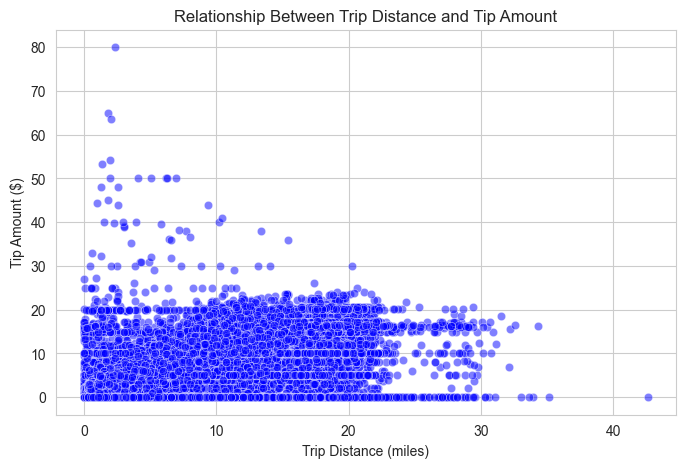

In [109]:

# Remove trips with 0 or negative trip distance or tip amounts
df_valid = df_filtered[(df_filtered["trip_distance"] > 0) & (df_filtered["tip_amount"] >= 0)]

# Compute correlation
correlation = df_valid["tip_amount"].corr(df_valid["trip_distance"])
print(f"Correlation between tip amount and trip distance: {correlation:.4f}")

# Scatter plot to visualize the relationship
plt.figure(figsize=(8,5))
sns.scatterplot(x=df_valid["trip_distance"], y=df_valid["tip_amount"], alpha=0.5, color="blue")

# Labels and title
plt.xlabel("Trip Distance (miles)")
plt.ylabel("Tip Amount ($)")
plt.title("Relationship Between Trip Distance and Tip Amount")

# Show the plot
plt.show()


**3.1.8** <font color = red>[3 marks]</font> <br>
Analyse the distribution of different payment types (`payment_type`)

In [ ]:
# Analyse the distribution of different payment types (payment_type).

- 1= Credit card
- 2= Cash
- 3= No charge
- 4= Dispute



In [110]:
import seaborn as sns
import matplotlib.pyplot as plt

# Mapping payment_type values to labels
payment_mapping = {
    1: "Credit Card",
    2: "Cash",
    3: "No Charge",
    4: "Dispute"
}

# Replace numeric payment_type values with labels
df_filtered["payment_type"] = df_filtered["payment_type"].map(payment_mapping)

# Count occurrences of each payment type
payment_counts = df_filtered["payment_type"].value_counts()

# Bar chart
plt.figure(figsize=(8,5))
sns.barplot(x=payment_counts.index, y=payment_counts.values, palette="coolwarm")

# Labels and title
plt.xlabel("Payment Type")
plt.ylabel("Number of Rides")
plt.title("Distribution of Payment Types")
plt.show()


##### Geographical Analysis

For this, you have to use the *taxi_zones.shp* file from the *taxi_zones* folder.

There would be multiple files inside the folder (such as *.shx, .sbx, .sbn* etc). You do not need to import/read any of the files other than the shapefile, *taxi_zones.shp*.

Do not change any folder structure - all the files need to be present inside the folder for it to work.

The folder structure should look like this:
```
Taxi Zones
|- taxi_zones.shp.xml
|- taxi_zones.prj
|- taxi_zones.sbn
|- taxi_zones.shp
|- taxi_zones.dbf
|- taxi_zones.shx
|- taxi_zones.sbx

 ```

 You only need to read the `taxi_zones.shp` file. The *shp* file will utilise the other files by itself.

We will use the *GeoPandas* library for geopgraphical analysis
```
import geopandas as gpd
```

More about geopandas and shapefiles: [About](https://geopandas.org/en/stable/about.html)


Reading the shapefile is very similar to *Pandas*. Use `gpd.read_file()` function to load the data (*taxi_zones.shp*) as a GeoDataFrame. Documentation: [Reading and Writing Files](https://geopandas.org/en/stable/docs/user_guide/io.html)

In [111]:
# !pip install geopandas

**3.1.9** <font color = red>[2 marks]</font> <br>
Load the shapefile and display it.

In [ ]:
# import geopandas as gpd
# Read the shapefile using geopandas

In [112]:
import geopandas as gpd
zones = gpd.read_file("C:/Users/Anjali/OneDrive/Desktop/Upgrad_DS/Main Class/NYC/Yellow_Taxi/Trip_Record/taxi_zones/taxi_zones.shp")
zones.head()

OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0         1    0.116357    0.000782           Newark Airport           1   
1         2    0.433470    0.004866              Jamaica Bay           2   
2         3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3         4    0.043567    0.000112            Alphabet City           4   
4         5    0.092146    0.000498            Arden Heights           5   

         borough                                           geometry  
0            EWR  POLYGON ((933100.918 192536.086, 933091.011 19...  
1         Queens  MULTIPOLYGON (((1033269.244 172126.008, 103343...  
2          Bronx  POLYGON ((1026308.77 256767.698, 1026495.593 2...  
3      Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...  
4  Staten Island  POLYGON ((935843.31 144283.336, 936046.565 144...

Now, if you look at the DataFrame created, you will see columns like: `OBJECTID`,`Shape_Leng`, `Shape_Area`, `zone`, `LocationID`, `borough`, `geometry`.
<br><br>

Now, the `locationID` here is also what we are using to mark pickup and drop zones in the trip records.

The geometric parameters like shape length, shape area and geometry are used to plot the zones on a map.

This can be easily done using the `plot()` method.

In [ ]:
# print(zones.info())
# zones.plot()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    263 non-null    int32   
 1   Shape_Leng  263 non-null    float64 
 2   Shape_Area  263 non-null    float64 
 3   zone        263 non-null    object  
 4   LocationID  263 non-null    int32   
 5   borough     263 non-null    object  
 6   geometry    263 non-null    geometry
dtypes: float64(2), geometry(1), int32(2), object(2)
memory usage: 12.5+ KB
None


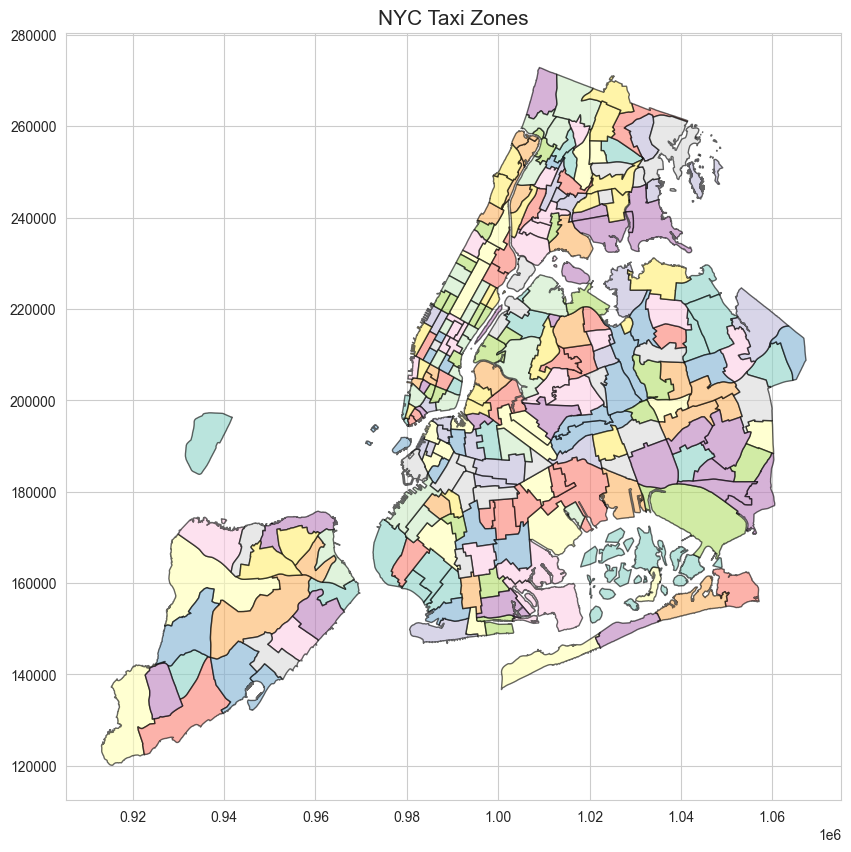

In [117]:
print(zones.info())

# zones.plot()
fig, ax = plt.subplots(figsize=(10, 10))
zones.plot(ax=ax, edgecolor="black", cmap="Set3", alpha=0.6)

# Add titles and labels
ax.set_title("NYC Taxi Zones", fontsize=15)
plt.axis("on")  # Remove axis for better visualization
plt.show()

Now, you have to merge the trip records and zones data using the location IDs.



**3.1.10** <font color = red>[3 marks]</font> <br>
Merge the zones data into trip data using the `locationID` and `PULocationID` columns.

In [120]:
# Merge zones and trip records using locationID and PULocationID

In [119]:
# Load the trip data
#trip_data_path = "/mnt/data/your_trip_data.parquet"  # Update with actual file name
#df = pd.read_parquet(trip_data_path)

# Load the taxi zones shapefile
#shapefile_path = "/mnt/data/taxi_zones.shp"
#zones = gpd.read_file(shapefile_path)

# Rename 'LocationID' to match trip data column names
zones = zones.rename(columns={"LocationID": "PULocationID"})

# Merge trip data with zones to get pickup location details
df = df.merge(zones[['PULocationID', 'zone', 'borough']], on="PULocationID", how="left")
df = df.rename(columns={"zone": "pickup_zone", "borough": "pickup_borough"})

# Merge again for drop-off locations (use a new copy of zones)
zones = zones.rename(columns={"PULocationID": "DOLocationID"})
df = df.merge(zones[['DOLocationID', 'zone', 'borough']], on="DOLocationID", how="left")
df = df.rename(columns={"zone": "dropoff_zone", "borough": "dropoff_borough"})

# Display the first few rows
print(df.head())


   VendorID     pickup_datetime    dropoff_datetime  passenger_count  \
0         2 2023-11-03 17:49:43 2023-11-03 18:01:34                1   
1         2 2023-09-01 05:34:05 2023-09-01 05:40:17                2   
2         2 2023-02-07 14:47:55 2023-02-07 14:57:34                2   
3         2 2023-12-18 18:48:36 2023-12-18 19:10:36                1   
4         2 2023-12-09 07:37:07 2023-12-09 07:41:58                1   

   trip_distance RatecodeID  PULocationID  DOLocationID payment_type  \
0           1.89        NaN           141           239          NaN   
1           1.18        NaN           100           161          NaN   
2           1.81        NaN           142            43          NaN   
3           2.79        NaN           163           151          NaN   
4           1.23        NaN           229           137          NaN   

   fare_amount  ...  congestion_surcharge        date  hour  pickup_hour  \
0         12.8  ...                   2.5  2023-11-03    1

**3.1.11** <font color = red>[3 marks]</font> <br>
Group data by location IDs to find the total number of trips per location ID

In [ ]:
# Group data by location and calculate the number of trips

In [150]:
# Count number of trips per Pickup Location
pickup_counts = df['PULocationID'].value_counts().reset_index()
pickup_counts.columns = ['LocationID', 'Pickup_Trips']

# Count number of trips per Drop-off Location
dropoff_counts = df['DOLocationID'].value_counts().reset_index()
dropoff_counts.columns = ['LocationID', 'Dropoff_Trips']

# Merge both counts to get total trips per location
location_trips = pd.merge(pickup_counts, dropoff_counts, on="LocationID", how="outer").fillna(0)

# Calculate total trips per location (Pickup + Dropoff)
location_trips["Total_Trips"] = location_trips["Pickup_Trips"] + location_trips["Dropoff_Trips"]

# Sort by total trips in descending order
location_trips = location_trips.sort_values(by="Total_Trips", ascending=False)

# Display the top 10 busiest locations
print(location_trips.head(10))


     LocationID  Pickup_Trips  Dropoff_Trips  Total_Trips
221         237       12385.0          11061      23446.0
220         236       10735.0          11724      22459.0
151         161       12179.0          10189      22368.0
152         162        9336.0           7344      16680.0
214         230        8454.0           8124      16578.0
133         142        8694.0           7327      16021.0
160         170        7850.0           7595      15445.0
223         239        7342.0           7451      14793.0
174         186        9037.0           5672      14709.0
123         132       11573.0           2563      14136.0


**3.1.12** <font color = red>[2 marks]</font> <br>
Now, use the grouped data to add number of trips to the GeoDataFrame.

We will use this to plot a map of zones showing total trips per zone.

In [ ]:
# Merge trip counts back to the zones GeoDataFrame

In [159]:
trips_per_location = df_filtered.groupby("PULocationID").size().reset_index(name="trip_count")
trips_per_location.count()


PULocationID    231
trip_count      231
dtype: int64

In [160]:
# Rename LocationID to match PULocationID
pickup_counts.rename(columns={'LocationID': 'PULocationID'}, inplace=True)

# Merge trip count data into GeoDataFrame
zones = zones.merge(pickup_counts, left_on='DOLocationID', right_on='PULocationID', how='left')

# Drop redundant PULocationID column after merging
zones.drop(columns=['PULocationID'], inplace=True)

# Fill NaN values in trip count with 0
zones['Pickup_Trips'] = zones['Pickup_Trips'].fillna(0)

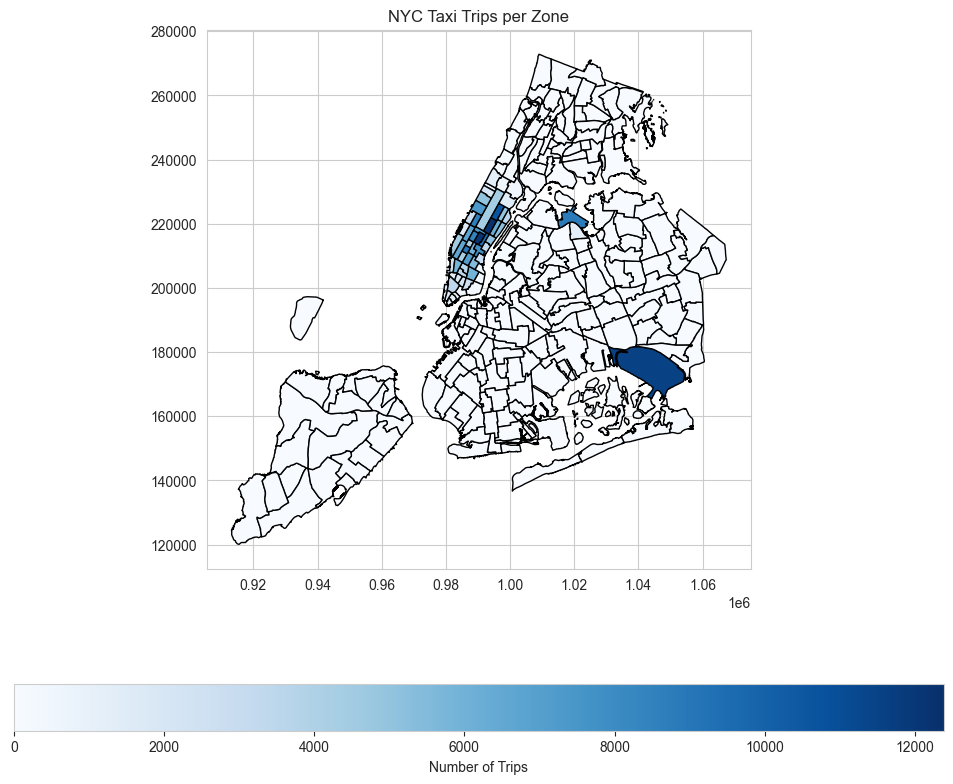

In [161]:
# Merge trip counts with the zones GeoDataFrame
# Plot updated choropleth map
fig, ax = plt.subplots(1, 1, figsize=(12, 10))
zones.plot(column='Pickup_Trips', ax=ax, legend=True, cmap='Blues', edgecolor='black',
           legend_kwds={'label': "Number of Trips", 'orientation': "horizontal"})
plt.title("NYC Taxi Trips per Zone")
plt.show()

The next step is creating a color map (choropleth map) showing zones by the number of trips taken.

Again, you can use the `zones.plot()` method for this. [Plot Method GPD](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.plot.html#geopandas.GeoDataFrame.plot)

But first, you need to define the figure and axis for the plot.

`fig, ax = plt.subplots(1, 1, figsize = (12, 10))`

This function creates a figure (fig) and a single subplot (ax)

---

After setting up the figure and axis, we can proceed to plot the GeoDataFrame on this axis. This is done in the next step where we use the plot method of the GeoDataFrame.

You can define the following parameters in the `zones.plot()` method:
```
column = '',
ax = ax,
legend = True,
legend_kwds = {'label': "label", 'orientation': "<horizontal/vertical>"}
```

To display the plot, use `plt.show()`.

**3.1.13** <font color = red>[3 marks]</font> <br>
Plot a color-coded map showing zone-wise trips

In [164]:
# Merge trip counts with the zones GeoDataFrame


In [ ]:
# Define figure and axis
# Plot the map and display it

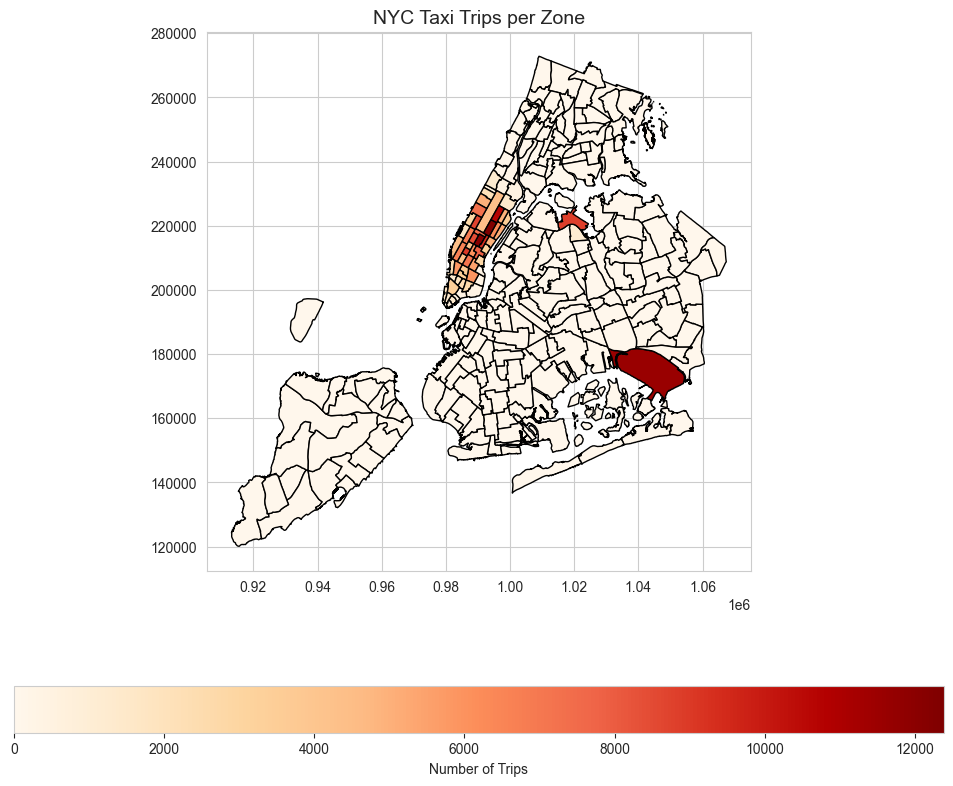

In [165]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Define figure and axis
fig, ax = plt.subplots(1, 1, figsize=(12, 10))

# Plot zones with trip count data
zones.plot(column='Pickup_Trips', ax=ax, legend=True, cmap='OrRd', edgecolor='black',
           legend_kwds={'label': "Number of Trips", 'orientation': "horizontal"})

# Add title
plt.title("NYC Taxi Trips per Zone", fontsize=14)

# Display the map
plt.show()


In [ ]:
# can you try displaying the zones DF sorted by the number of trips?


In [166]:
# Sort the zones GeoDataFrame by the number of trips in descending order
zones_sorted = zones.sort_values(by="Pickup_Trips", ascending=False)

# Display the top rows
zones_sorted.head(10)

OBJECTID  Shape_Leng  Shape_Area                          zone  \
236       237    0.042213    0.000096         Upper East Side South   
160       161    0.035804    0.000072                Midtown Center   
131       132    0.245479    0.002038                   JFK Airport   
235       236    0.044252    0.000103         Upper East Side North   
161       162    0.035270    0.000048                  Midtown East   
185       186    0.024696    0.000037  Penn Station/Madison Sq West   
137       138    0.107467    0.000537             LaGuardia Airport   
141       142    0.038176    0.000076           Lincoln Square East   
229       230    0.031028    0.000056     Times Sq/Theatre District   
169       170    0.045769    0.000074                   Murray Hill   

     LocationID    borough                                           geometry  \
236         237  Manhattan  POLYGON ((993633.442 216961.016, 993507.232 21...   
160         161  Manhattan  POLYGON ((991081.026 214453.698, 990952.644 21...   
131         132     Queens  MULTIPOLYGON (((1032791.001 181085.006, 103283...   
235         236  Manhattan  POLYGON ((995940.048 221122.92, 995812.322 220...   
161         162  Manhattan  POLYGON ((992224.354 214415.293, 992096.999 21...   
185         186  Manhattan  POLYGON ((986752.603 210853.699, 986627.863 21...   
137         138     Queens  MULTIPOLYGON (((1019904.219 225677.983, 102031...   
141         142  Manhattan  POLYGON ((989380.305 218980.247, 989359.803 21...   
229         230  Manhattan  POLYGON ((988786.877 214532.094, 988650.277 21...   
169         170  Manhattan  POLYGON ((991999.299 210994.739, 991972.635 21...   

     Pickup_Trips_x  Pickup_Trips_y  Pickup_Trips  
236         12385.0         12385.0       12385.0  
160         12179.0         12179.0       12179.0  
131         11573.0         11573.0       11573.0  
235         10735.0         10735.0       10735.0  
161          9336.0          9336.0        9336.0  
185          9037.0          9037.0        9037.0  
137          8840.0          8840.0        8840.0  
141          8694.0          8694.0        8694.0  
229          8454.0          8454.0        8454.0  
169          7850.0          7850.0        7850.0

Here we have completed the temporal, financial and geographical analysis on the trip records.

**Compile your findings from general analysis below:**

You can consider the following points:

* Busiest hours, days and months
* Trends in revenue collected
* Trends in quarterly revenue
* How fare depends on trip distance, trip duration and passenger counts
* How tip amount depends on trip distance
* Busiest zones


#### **3.2** Detailed EDA: Insights and Strategies
<font color = red>[50 marks]</font> <br>

Having performed basic analyses for finding trends and patterns, we will now move on to some detailed analysis focussed on operational efficiency, pricing strategies, and customer experience.

##### Operational Efficiency

Analyze variations by time of day and location to identify bottlenecks or inefficiencies in routes

**3.2.1** <font color = red>[3 marks]</font> <br>
Identify slow routes by calculating the average time taken by cabs to get from one zone to another at different hours of the day.

Speed on a route *X* for hour *Y* = (*distance of the route X / average trip duration for hour Y*)

In [ ]:
# Find routes which have the slowest speeds at different times of the day


In [174]:
df['trip_duration'] = (df['dropoff_datetime'] - df['pickup_datetime']).dt.total_seconds()
df_filtered = df[(df['trip_distance'] > 0) & (df['trip_duration'] > 0)]
df_filtered['trip_duration_hours'] = df_filtered['trip_duration'] / 3600
df_filtered['speed_mph'] = df_filtered['trip_distance'] / df_filtered['trip_duration_hours']
# Group by route (pickup and drop-off zones) and hour of the day
route_speed = df_filtered.groupby(['PULocationID', 'DOLocationID', 'pickup_hour'])['speed_mph'].mean().reset_index()

# Find the slowest routes (lowest speeds)
slowest_routes = route_speed.sort_values(by='speed_mph').head(10)

# Display slowest routes
print(slowest_routes)

       PULocationID  DOLocationID  pickup_hour  speed_mph
13047           100            24           17   0.018595
18207           125           231            8   0.038277
43237           226           226            7   0.053892
36295           163           237            2   0.061287
14823           107           148            8   0.074109
13355           100           113           19   0.084396
47216           233            43           22   0.090693
10463            86            86           11   0.102041
35566           163            89           19   0.110633
17540           116            45            7   0.130957


How does identifying high-traffic, high-demand routes help us? 

Identifying high-traffic, high-demand routes provides several key benefits for operational efficiency, pricing strategies, and customer experience. Here’s how it helps:

1. Operational Efficiency 
Optimize Fleet Distribution: Taxi companies can allocate more cabs to high-demand areas, reducing passenger wait times.
Improve Route Planning: Identifying congestion-prone areas allows for smarter routing strategies to avoid delays.
Driver Scheduling: More drivers can be scheduled during peak demand hours in high-traffic zones.

3. Pricing Strategies 
Dynamic Pricing: Surge pricing can be applied to high-demand routes to maximize revenue.
Promotional Discounts: Discounts can be offered on less popular routes to balance demand.
Fare Adjustments: Fare structures can be revised based on demand trends, ensuring fair pricing for both passengers and drivers.


5. Customer Experience 
Reduced Wait Times: More taxis in high-demand areas mean faster pickups for passengers.
Better Ride Availability: Ensures cabs are readily available where and when they are needed the most.
Faster Travel Times: Avoiding slow routes improves passenger satisfaction and increases the number of trips per driver.


7. Strategic Partnerships & Expansion 
Business Expansion: Taxi companies can identify underserved high-demand areas to expand operations.
Collaboration with Businesses: Hotels, airports, and event venues in high-demand areas can partner with taxi services for better accessibility.
Infrastructure Planning: Insights from demand patterns can support city planners in optimizing roads and traffic management.

**3.2.2** <font color = red>[3 marks]</font> <br>
Calculate the number of trips at each hour of the day and visualise them. Find the busiest hour and show the number of trips for that hour.

In [ ]:
# Visualise the number of trips per hour and find the busiest hour

Remember, we took a fraction of trips. To find the actual number, you have to scale the number up by the sampling ratio.

In [175]:
# Group data by hour and count trips
hourly_trips = df_filtered.groupby("pickup_hour").size().reset_index(name="trip_count")

# Scale up the counts by sampling ratio
sampling_ratio = len(df) / len(df_filtered)  # Estimate based on original dataset size
hourly_trips["scaled_trip_count"] = hourly_trips["trip_count"] * sampling_ratio

# Find the busiest hour
busiest_hour = hourly_trips.loc[hourly_trips["scaled_trip_count"].idxmax()]

# Plot hourly trip distribution
plt.figure(figsize=(12, 6))
sns.barplot(x=hourly_trips["pickup_hour"], y=hourly_trips["scaled_trip_count"], palette="Blues_r")
plt.axvline(busiest_hour["pickup_hour"], color='red', linestyle='--', label=f'Busiest Hour: {int(busiest_hour["pickup_hour"])}')
plt.xlabel("Hour of the Day")
plt.ylabel("Estimated Number of Trips")
plt.title("Hourly Taxi Demand in NYC")
plt.legend()
plt.xticks(range(0, 24))
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

# Print busiest hour details
print(f"Busiest Hour: {int(busiest_hour['pickup_hour'])}")
print(f"Estimated Number of Trips: {int(busiest_hour['scaled_trip_count'])}")

Busiest Hour: 18
Estimated Number of Trips: 18108


**3.2.3** <font color = red>[2 mark]</font> <br>
Find the actual number of trips in the five busiest hours

In [ ]:
# Scale up the number of trips

# Fill in the value of your sampling fraction and use that to scale up the numbers
sample_fraction =

In [178]:
sample_fraction = len(df_filtered) / len(df)
hourly_trips["scaled_trip_count"] = hourly_trips["trip_count"] / sample_fraction
sample_fraction = len(df_filtered) / len(df)

# Group by pickup hour and count trips
hourly_trips = df_filtered.groupby("pickup_hour").size().reset_index(name="trip_count")

# Scale up trip count using sampling fraction
hourly_trips["scaled_trip_count"] = hourly_trips["trip_count"] / sample_fraction

# Get five busiest hours
busiest_hours = hourly_trips.nlargest(5, "scaled_trip_count")

# Display results
print("Five Busiest Hours (Actual Estimated Trips):")
print(busiest_hours)

Five Busiest Hours (Actual Estimated Trips):
    pickup_hour  trip_count  scaled_trip_count
18           18       18108       18108.354058
17           17       17244       17244.337164
19           19       16112       16112.315031
15           15       15864       15864.310182
16           16       15829       15829.309497


**3.2.4** <font color = red>[3 marks]</font> <br>
Compare hourly traffic pattern on weekdays. Also compare for weekend.

In [ ]:
# Compare traffic trends for the week days and weekends

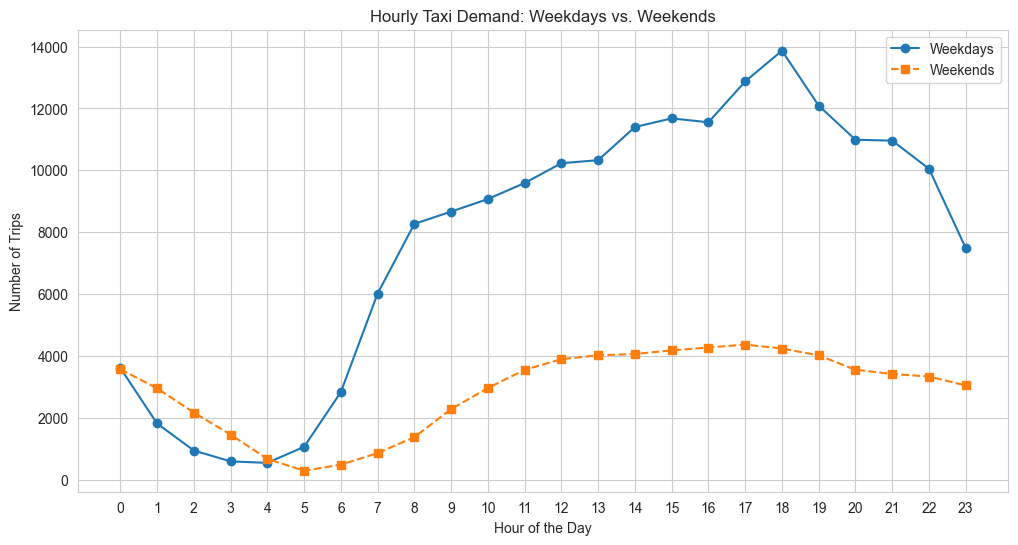

In [179]:
import matplotlib.pyplot as plt

# Create a column for weekday (0=Monday, 6=Sunday)
df_filtered["weekday"] = df_filtered["pickup_datetime"].dt.weekday

# Separate Weekday & Weekend Data
weekday_trips = df_filtered[df_filtered["weekday"] < 5]  # Monday-Friday
weekend_trips = df_filtered[df_filtered["weekday"] >= 5]  # Saturday-Sunday

# Group by hour and count trips
weekday_hourly = weekday_trips.groupby("pickup_hour").size().reset_index(name="weekday_trips")
weekend_hourly = weekend_trips.groupby("pickup_hour").size().reset_index(name="weekend_trips")

# Merge both datasets for easy comparison
hourly_comparison = weekday_hourly.merge(weekend_hourly, on="pickup_hour", how="outer").fillna(0)

# Plot the comparison
plt.figure(figsize=(12, 6))
plt.plot(hourly_comparison["pickup_hour"], hourly_comparison["weekday_trips"], marker="o", label="Weekdays", linestyle="-")
plt.plot(hourly_comparison["pickup_hour"], hourly_comparison["weekend_trips"], marker="s", label="Weekends", linestyle="--")

# Formatting
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Trips")
plt.title("Hourly Taxi Demand: Weekdays vs. Weekends")
plt.xticks(range(0, 24))
plt.legend()
plt.grid(True)

# Show plot
plt.show()


What can you infer from the above patterns? How will finding busy and quiet hours for each day help us?

Insights from Hourly Traffic Patterns (Weekdays vs. Weekends)
Peak Hours Vary by Day Type:

Weekdays: Taxi demand peaks during morning (7-9 AM) and evening (4-7 PM) rush hours, driven by office commuters.
Weekends: Demand shifts to later in the day (afternoons and evenings), possibly due to shopping, dining, and nightlife.
Late-Night Trends:

Higher taxi demand between 12 AM – 4 AM on weekends (likely due to bars, clubs, and late-night travelers).
Weekday late-night traffic is lower, suggesting fewer leisure trips.
Midday Activity:

Weekdays show a steady demand from 10 AM - 3 PM (possibly from tourists, business travelers, and errands).
Weekends have a slower start in the morning but a strong rise after noon, possibly due to brunch, shopping, and entertainment.
Why is Identifying Busy and Quiet Hours Important?
Optimized Fleet Allocation & Driver Scheduling

More cabs during peak hours to reduce wait times and increase trip efficiency.
Fewer cabs during off-peak hours to avoid idle time and operational costs.
Surge Pricing Strategy

Higher fares can be strategically applied during rush hours and weekend nights when demand is high.
Lower fares during quiet hours to encourage ridership and reduce idle taxis.
Improved Customer Experience

Reduce wait times in busy hours by ensuring enough cabs are available.
Encourage customers to book in low-demand hours using discounts.
Targeted Promotions & Marketing

Offer discounts during off-peak hours to attract passengers.
Promote special ride packages for weekend leisure trips or late-night rides.
Better Traffic Management & Efficiency

Adjust routing strategies based on peak congestion times.
Identify quiet hours and routes where taxis can take longer breaks.

**3.2.5** <font color = red>[3 marks]</font> <br>
Identify top 10 zones with high hourly pickups. Do the same for hourly dropoffs. Show pickup and dropoff trends in these zones.

In [ ]:
# Find top 10 pickup and dropoff zones

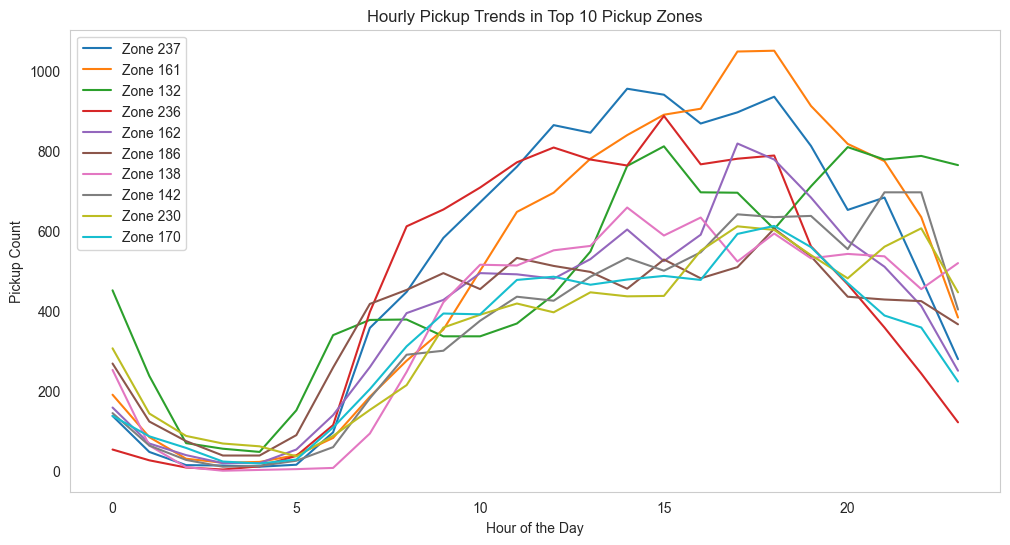

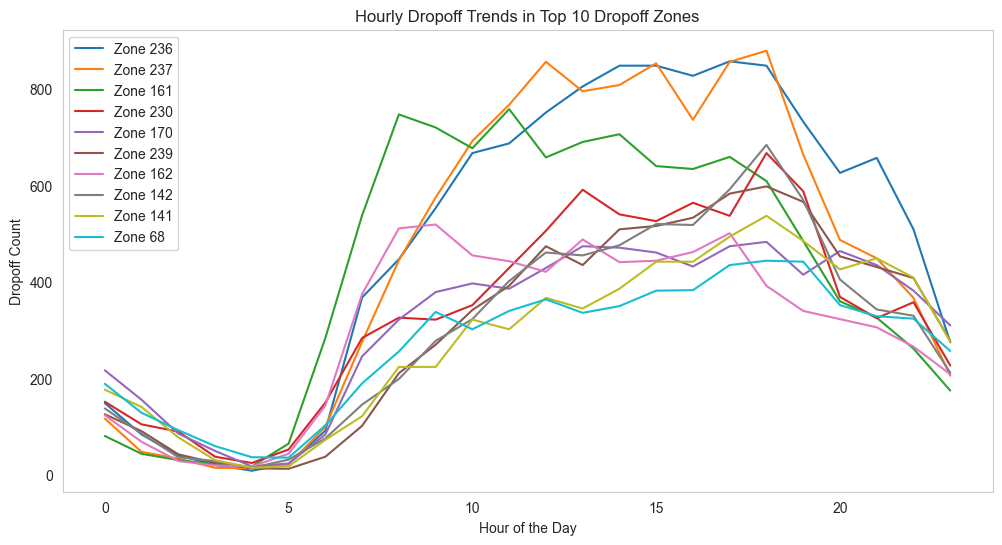

In [180]:

# Group by pickup location and hour, then count trips
pickup_counts = df_filtered.groupby(['PULocationID', 'hour']).size().reset_index(name="pickup_count")

# Group by dropoff location and hour, then count trips
dropoff_counts = df_filtered.groupby(['DOLocationID', 'hour']).size().reset_index(name="dropoff_count")

# Get top 10 zones with the highest pickups
top_pickup_zones = pickup_counts.groupby("PULocationID")["pickup_count"].sum().nlargest(10).index

# Get top 10 zones with the highest drop-offs
top_dropoff_zones = dropoff_counts.groupby("DOLocationID")["dropoff_count"].sum().nlargest(10).index

# Filter data for these top zones
top_pickup_trends = pickup_counts[pickup_counts["PULocationID"].isin(top_pickup_zones)]
top_dropoff_trends = dropoff_counts[dropoff_counts["DOLocationID"].isin(top_dropoff_zones)]

# Plot hourly trends for top pickup zones
plt.figure(figsize=(12, 6))
for zone in top_pickup_zones:
    zone_data = top_pickup_trends[top_pickup_trends["PULocationID"] == zone]
    plt.plot(zone_data["hour"], zone_data["pickup_count"], label=f"Zone {zone}")

plt.xlabel("Hour of the Day")
plt.ylabel("Pickup Count")
plt.title("Hourly Pickup Trends in Top 10 Pickup Zones")
plt.legend()
plt.grid()
plt.show()

# Plot hourly trends for top dropoff zones
plt.figure(figsize=(12, 6))
for zone in top_dropoff_zones:
    zone_data = top_dropoff_trends[top_dropoff_trends["DOLocationID"] == zone]
    plt.plot(zone_data["hour"], zone_data["dropoff_count"], label=f"Zone {zone}")

plt.xlabel("Hour of the Day")
plt.ylabel("Dropoff Count")
plt.title("Hourly Dropoff Trends in Top 10 Dropoff Zones")
plt.legend()
plt.grid()
plt.show()


**3.2.6** <font color = red>[3 marks]</font> <br>
Find the ratio of pickups and dropoffs in each zone. Display the 10 highest (pickup/drop) and 10 lowest (pickup/drop) ratios.

In [ ]:
# Find the top 10 and bottom 10 pickup/dropoff ratios

In [181]:
import pandas as pd

# Aggregate total pickups and dropoffs per zone
pickup_counts = df_filtered.groupby("PULocationID").size().reset_index(name="total_pickups")
dropoff_counts = df_filtered.groupby("DOLocationID").size().reset_index(name="total_dropoffs")

# Rename columns for merging
pickup_counts.rename(columns={"PULocationID": "LocationID"}, inplace=True)
dropoff_counts.rename(columns={"DOLocationID": "LocationID"}, inplace=True)

# Merge both datasets on LocationID
zone_ratios = pd.merge(pickup_counts, dropoff_counts, on="LocationID", how="outer").fillna(0)

# Calculate pickup/dropoff ratio
zone_ratios["pickup_drop_ratio"] = zone_ratios["total_pickups"] / zone_ratios["total_dropoffs"]
zone_ratios.replace([float("inf"), -float("inf")], 0, inplace=True)  # Replace infinite ratios with 0

# Find top 10 highest pickup/dropoff ratios
top_10_highest_ratios = zone_ratios.sort_values(by="pickup_drop_ratio", ascending=False).head(10)

# Find top 10 lowest pickup/dropoff ratios
top_10_lowest_ratios = zone_ratios.sort_values(by="pickup_drop_ratio", ascending=True).head(10)

# Display results
print("Top 10 zones with the highest pickup/dropoff ratios:")
print(top_10_highest_ratios)

print("\nTop 10 zones with the lowest pickup/dropoff ratios:")
print(top_10_lowest_ratios)


Top 10 zones with the highest pickup/dropoff ratios:
     LocationID  total_pickups  total_dropoffs  pickup_drop_ratio
68           70         1188.0             143           8.307692
123         132        11573.0            2563           4.515412
129         138         8840.0            3047           2.901214
174         186         9037.0            5672           1.593265
3             5            3.0               2           1.500000
106         114         3446.0            2406           1.432253
41           43         4372.0            3161           1.383107
233         249         5849.0            4447           1.315269
152         162         9336.0            7344           1.271242
96          100         4243.0            3542           1.197911

Top 10 zones with the lowest pickup/dropoff ratios:
     LocationID  total_pickups  total_dropoffs  pickup_drop_ratio
124         133            0.0              54                0.0
25           27            0.0      

**3.2.7** <font color = red>[3 marks]</font> <br>
Identify zones with high pickup and dropoff traffic during night hours (11PM to 5AM)

In [ ]:
# During night hours (11pm to 5am) find the top 10 pickup and dropoff zones
# Note that the top zones should be of night hours and not the overall top zones



Now, let us find the revenue share for the night time hours and the day time hours. After this, we will move to deciding a pricing strategy.

**3.2.8** <font color = red>[2 marks]</font> <br>
Find the revenue share for nighttime and daytime hours.

In [ ]:
# Filter for night hours (11 PM to 5 AM)

In [182]:
# Filter trips occurring between 11 PM and 5 AM
night_hours = df_filtered[(df_filtered["pickup_hour"] >= 23) | (df_filtered["pickup_hour"] <= 5)]

# Count night-time pickups per zone
night_pickups = night_hours.groupby("PULocationID").size().reset_index(name="night_pickups")

# Count night-time dropoffs per zone
night_dropoffs = night_hours.groupby("DOLocationID").size().reset_index(name="night_dropoffs")

# Merge with zone names for better readability
night_pickups = night_pickups.merge(zones[['LocationID', 'zone']], left_on="PULocationID", right_on="LocationID", how="left").drop(columns=["LocationID"])
night_dropoffs = night_dropoffs.merge(zones[['LocationID', 'zone']], left_on="DOLocationID", right_on="LocationID", how="left").drop(columns=["LocationID"])

# Get top 10 pickup and dropoff zones
top_night_pickups = night_pickups.sort_values("night_pickups", ascending=False).head(10)
top_night_dropoffs = night_dropoffs.sort_values("night_dropoffs", ascending=False).head(10)

# Display results
print("Top 10 Pickup Zones During Night Hours (11 PM - 5 AM):")
print(top_night_pickups)

print("\nTop 10 Dropoff Zones During Night Hours (11 PM - 5 AM):")
print(top_night_dropoffs)


Top 10 Pickup Zones During Night Hours (11 PM - 5 AM):
     PULocationID  night_pickups                          zone
44             79           2208                  East Village
149           249           1816                  West Village
73            132           1781                   JFK Airport
25             48           1517                  Clinton East
84            148           1354               Lower East Side
64            114           1304       Greenwich Village South
133           230           1154     Times Sq/Theatre District
106           186           1003  Penn Station/Madison Sq West
93            164            866                 Midtown South
76            138            856             LaGuardia Airport

Top 10 Dropoff Zones During Night Hours (11 PM - 5 AM):
     DOLocationID  night_dropoffs                       zone
72             79            1217               East Village
41             48             997               Clinton East
154         

##### Pricing Strategy

**3.2.9** <font color = red>[2 marks]</font> <br>
For the different passenger counts, find the average fare per mile per passenger.

For instance, suppose the average fare per mile for trips with 3 passengers is 3 USD/mile, then the fare per mile per passenger will be 1 USD/mile.

In [ ]:
# Analyse the fare per mile per passenger for different passenger counts

In [183]:
# Filter out trips with zero or negative distance
valid_trips = df_filtered[df_filtered["trip_distance"] > 0].copy()

# Calculate fare per mile
valid_trips["fare_per_mile"] = valid_trips["fare_amount"] / valid_trips["trip_distance"]

# Group by passenger count and calculate the average fare per mile
avg_fare_per_mile = valid_trips.groupby("passenger_count")["fare_per_mile"].mean().reset_index()

# Calculate fare per mile per passenger
avg_fare_per_mile["fare_per_mile_per_passenger"] = avg_fare_per_mile["fare_per_mile"] / avg_fare_per_mile["passenger_count"]

# Display results
print(avg_fare_per_mile.sort_values("passenger_count"))


   passenger_count  fare_per_mile  fare_per_mile_per_passenger
0                1       9.924042                     9.924042
1                2      12.620945                     6.310472
2                3      11.275934                     3.758645
3                4      10.237743                     2.559436
4                5       8.012575                     1.602515
5                6       8.436196                     1.406033


**3.2.10** <font color = red>[3 marks]</font> <br>
Find the average fare per mile by hours of the day and by days of the week

In [ ]:
# Compare the average fare per mile for different days and for different times of the day

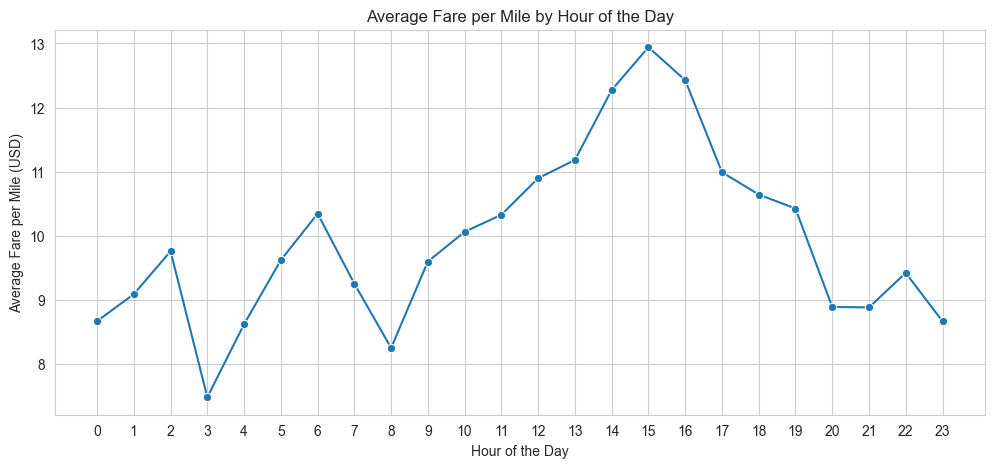

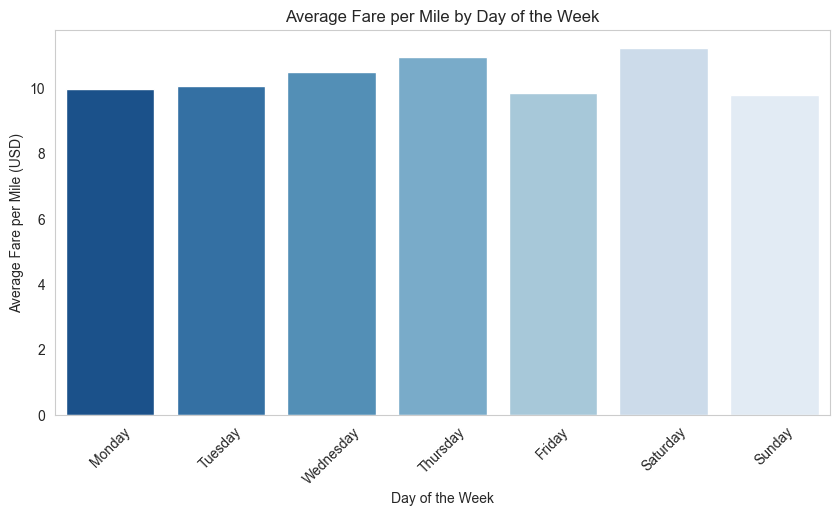

In [184]:
# Filter out trips with zero or negative distance
valid_trips = df_filtered[df_filtered["trip_distance"] > 0].copy()

# Calculate fare per mile
valid_trips["fare_per_mile"] = valid_trips["fare_amount"] / valid_trips["trip_distance"]

# Group by hour of the day and calculate the average fare per mile
hourly_fare_per_mile = valid_trips.groupby("pickup_hour")["fare_per_mile"].mean().reset_index()

# Group by day of the week and calculate the average fare per mile
daily_fare_per_mile = valid_trips.groupby("pickup_day")["fare_per_mile"].mean().reset_index()

# Sort days for proper visualization
day_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
daily_fare_per_mile["pickup_day"] = pd.Categorical(daily_fare_per_mile["pickup_day"], categories=day_order, ordered=True)
daily_fare_per_mile = daily_fare_per_mile.sort_values("pickup_day")

# Plot average fare per mile by hour
plt.figure(figsize=(12, 5))
sns.lineplot(x="pickup_hour", y="fare_per_mile", data=hourly_fare_per_mile, marker="o")
plt.xlabel("Hour of the Day")
plt.ylabel("Average Fare per Mile (USD)")
plt.title("Average Fare per Mile by Hour of the Day")
plt.xticks(range(0, 24))
plt.grid(True)
plt.show()

# Plot average fare per mile by day of the week
plt.figure(figsize=(10, 5))
sns.barplot(x="pickup_day", y="fare_per_mile", data=daily_fare_per_mile, palette="Blues_r")
plt.xlabel("Day of the Week")
plt.ylabel("Average Fare per Mile (USD)")
plt.title("Average Fare per Mile by Day of the Week")
plt.xticks(rotation=45)
plt.grid(axis="y")
plt.show()


**3.2.11** <font color = red>[3 marks]</font> <br>
Analyse the average fare per mile for the different vendors for different hours of the day

In [ ]:
# Compare fare per mile for different vendors

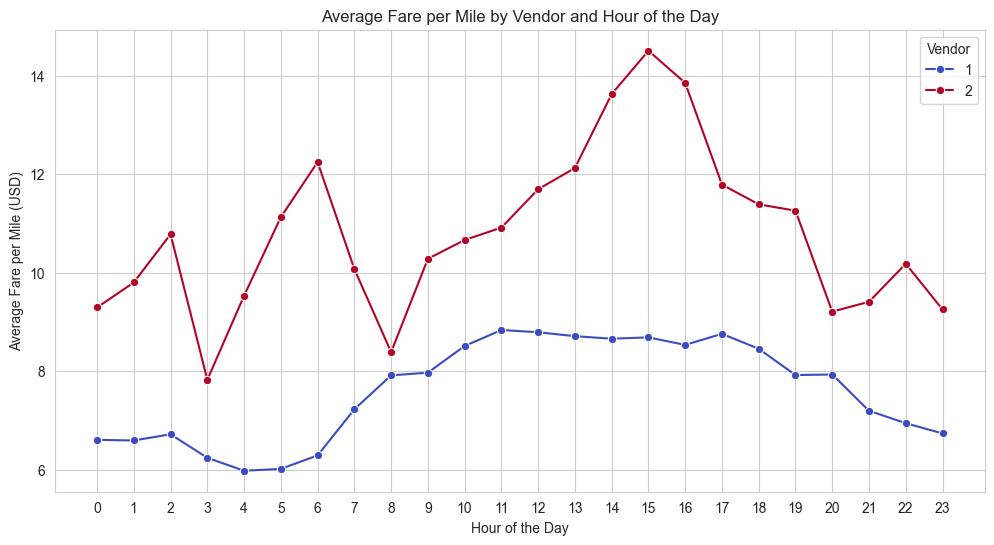

In [185]:
# Filter valid trips (distance > 0)
valid_trips = df_filtered[df_filtered["trip_distance"] > 0].copy()

# Calculate fare per mile
valid_trips["fare_per_mile"] = valid_trips["fare_amount"] / valid_trips["trip_distance"]

# Group by VendorID and pickup hour, then calculate the average fare per mile
hourly_vendor_fare = valid_trips.groupby(["VendorID", "pickup_hour"])["fare_per_mile"].mean().reset_index()

# Plot the average fare per mile for each vendor over different hours
plt.figure(figsize=(12, 6))
sns.lineplot(x="pickup_hour", y="fare_per_mile", hue="VendorID", data=hourly_vendor_fare, marker="o", palette="coolwarm")
plt.xlabel("Hour of the Day")
plt.ylabel("Average Fare per Mile (USD)")
plt.title("Average Fare per Mile by Vendor and Hour of the Day")
plt.xticks(range(0, 24))
plt.legend(title="Vendor")
plt.grid(True)
plt.show()


**3.2.12** <font color = red>[5 marks]</font> <br>
Compare the fare rates of the different vendors in a tiered fashion. Analyse the average fare per mile for distances upto 2 miles. Analyse the fare per mile for distances from 2 to 5 miles. And then for distances more than 5 miles.


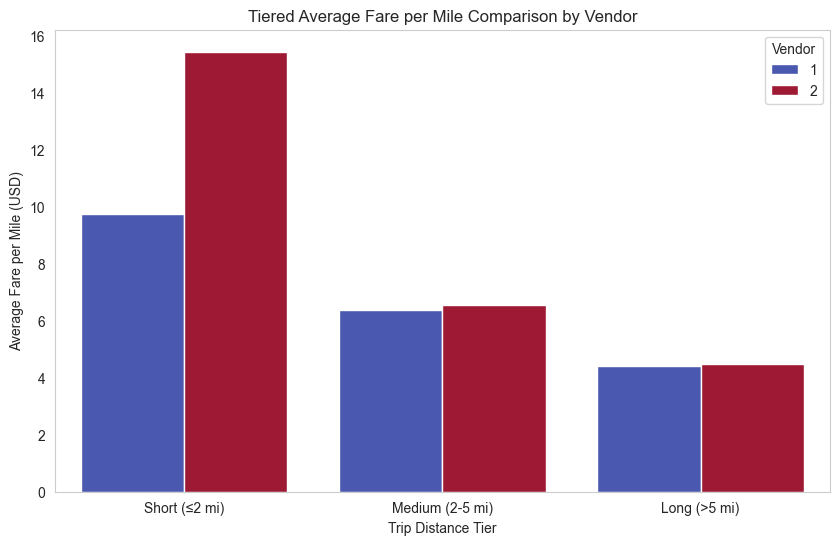

In [186]:
# Filter valid trips (distance > 0)
valid_trips = df_filtered[df_filtered["trip_distance"] > 0].copy()

# Calculate fare per mile
valid_trips["fare_per_mile"] = valid_trips["fare_amount"] / valid_trips["trip_distance"]

# Create distance tiers
valid_trips["distance_tier"] = pd.cut(valid_trips["trip_distance"], 
                                      bins=[0, 2, 5, float("inf")], 
                                      labels=["Short (≤2 mi)", "Medium (2-5 mi)", "Long (>5 mi)"])

# Group by vendor and distance tier, then calculate average fare per mile
tiered_fare_rates = valid_trips.groupby(["VendorID", "distance_tier"])["fare_per_mile"].mean().reset_index()

# Plot the results
plt.figure(figsize=(10, 6))
sns.barplot(x="distance_tier", y="fare_per_mile", hue="VendorID", data=tiered_fare_rates, palette="coolwarm")
plt.xlabel("Trip Distance Tier")
plt.ylabel("Average Fare per Mile (USD)")
plt.title("Tiered Average Fare per Mile Comparison by Vendor")
plt.legend(title="Vendor")
plt.grid(axis="y")
plt.show()


In [188]:
# Defining distance tiers
df_filtered["distance_tier"] = pd.cut(df_filtered["trip_distance"], 
                                      bins=[0, 2, 5, float("inf")], 
                                      labels=["Short (≤2 mi)", "Medium (2-5 mi)", "Long (>5 mi)"])
df_filtered["distance_tier"].value_counts()

distance_tier
Short (≤2 mi)      144578
Medium (2-5 mi)     70215
Long (>5 mi)        40928
Name: count, dtype: int64

##### Customer Experience and Other Factors

**3.2.13** <font color = red>[5 marks]</font> <br>
Analyse average tip percentages based on trip distances, passenger counts and time of pickup. What factors lead to low tip percentages?

In [ ]:
#  Analyze tip percentages based on distances, passenger counts and pickup times

In [189]:
df_filtered["tip_percentage"] = (df_filtered["tip_amount"] / df_filtered["fare_amount"]) * 100
df_filtered["distance_tier"] = pd.cut(df_filtered["trip_distance"], 
                                      bins=[0, 2, 5, float("inf")], 
                                      labels=["Short (≤2 mi)", "Medium (2-5 mi)", "Long (>5 mi)"])

# Compute the average tip percentage for each distance category
tip_by_distance = df_filtered.groupby("distance_tier")["tip_percentage"].mean()
print(tip_by_distance)
tip_by_passenger = df_filtered.groupby("passenger_count")["tip_percentage"].mean()
print(tip_by_passenger)
df_filtered["time_of_day"] = pd.cut(df_filtered["pickup_hour"], 
                                    bins=[0, 6, 12, 18, 24], 
                                    labels=["Night (12AM-6AM)", "Morning (6AM-12PM)", "Afternoon (12PM-6PM)", "Evening (6PM-12AM)"], 
                                    include_lowest=True)

tip_by_time = df_filtered.groupby("time_of_day")["tip_percentage"].mean()
print(tip_by_time)


distance_tier
Short (≤2 mi)      22.424416
Medium (2-5 mi)    18.758754
Long (>5 mi)       16.608134
Name: tip_percentage, dtype: float64
passenger_count
1    20.743662
2    19.876919
3    19.208694
4    17.465455
5    20.852415
6    20.505748
Name: tip_percentage, dtype: float64
time_of_day
Night (12AM-6AM)        20.081981
Morning (6AM-12PM)      19.436618
Afternoon (12PM-6PM)    20.483462
Evening (6PM-12AM)      21.645103
Name: tip_percentage, dtype: float64


Additional analysis [optional]: Let's try comparing cases of low tips with cases of high tips to find out if we find a clear aspect that drives up the tipping behaviours

In [ ]:
# Compare trips with tip percentage < 10% to trips with tip percentage > 25%

In [190]:
df_filtered["tip_category"] = pd.cut(df_filtered["tip_percentage"], 
                                     bins=[0, 10, 25, 100], 
                                     labels=["Low Tip (<10%)", "Medium Tip (10-25%)", "High Tip (>25%)"])
avg_distance = df_filtered.groupby("tip_category")["trip_distance"].mean()
print(avg_distance)
passenger_comparison = df_filtered.groupby("tip_category")["passenger_count"].mean()
print(passenger_comparison)
pickup_time_comparison = df_filtered.groupby("tip_category")["pickup_hour"].mean()
print(pickup_time_comparison)
payment_tips = df_filtered.groupby(["payment_type", "tip_category"]).size().unstack()
print(payment_tips)
fare_comparison = df_filtered.groupby("tip_category")["total_amount"].mean()
print(fare_comparison)


tip_category
Low Tip (<10%)         4.347052
Medium Tip (10-25%)    4.609541
High Tip (>25%)        2.199553
Name: trip_distance, dtype: float64
tip_category
Low Tip (<10%)         1.372916
Medium Tip (10-25%)    1.379852
High Tip (>25%)        1.361165
Name: passenger_count, dtype: float64
tip_category
Low Tip (<10%)         13.991307
Medium Tip (10-25%)    14.192058
High Tip (>25%)        14.588199
Name: pickup_hour, dtype: float64
Empty DataFrame
Columns: []
Index: []
tip_category
Low Tip (<10%)         30.641282
Medium Tip (10-25%)    34.981139
High Tip (>25%)        23.815417
Name: total_amount, dtype: float64


**3.2.14** <font color = red>[3 marks]</font> <br>
Analyse the variation of passenger count across hours and days of the week.

In [ ]:
# See how passenger count varies across hours and days


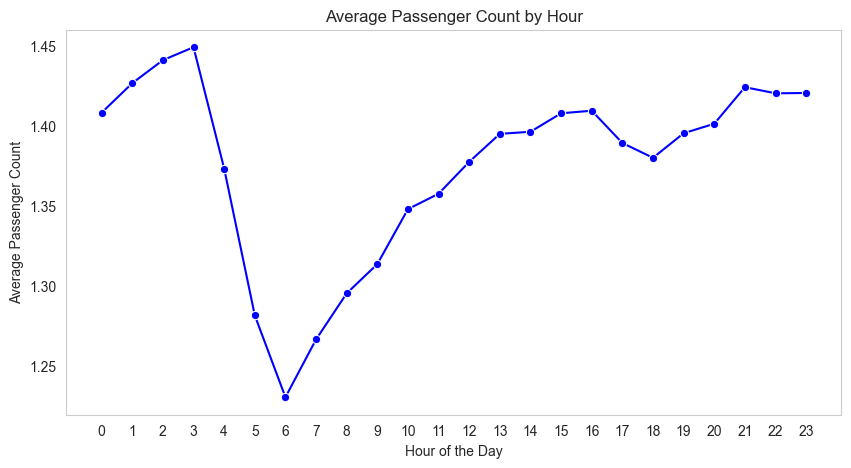

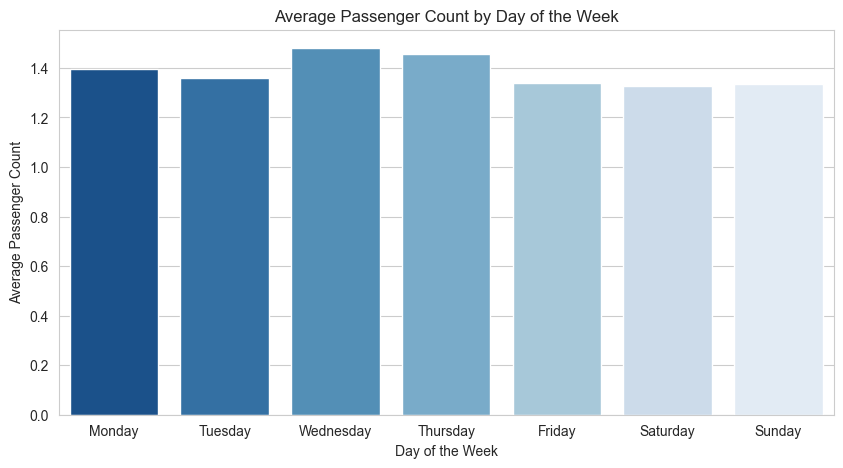

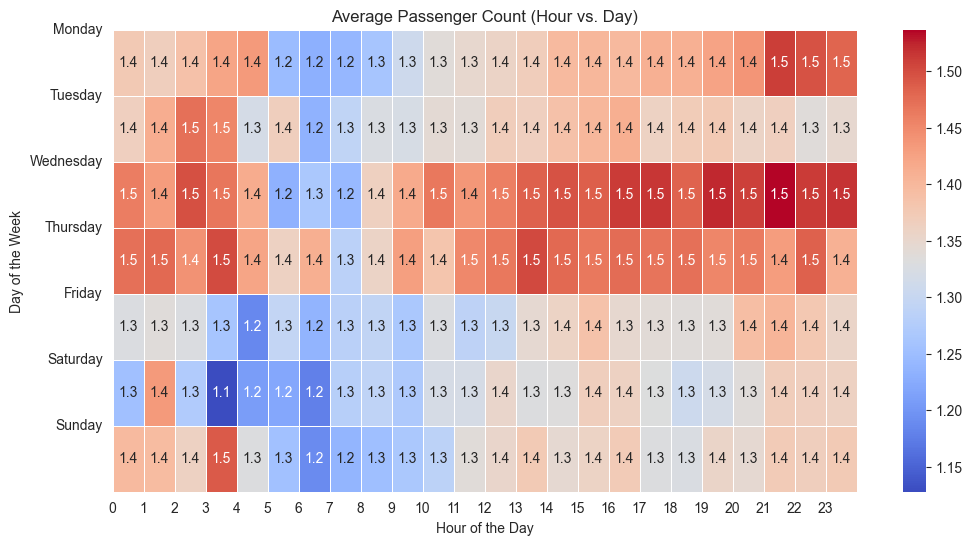

In [191]:
hourly_passenger_count = df_filtered.groupby("pickup_hour")["passenger_count"].mean()

# Plot the data
plt.figure(figsize=(10, 5))
sns.lineplot(x=hourly_passenger_count.index, y=hourly_passenger_count.values, marker='o', color='blue')
plt.title("Average Passenger Count by Hour")
plt.xlabel("Hour of the Day")
plt.ylabel("Average Passenger Count")
plt.xticks(range(24))
plt.grid()
plt.show()

daywise_passenger_count = df_filtered.groupby("pickup_day")["passenger_count"].mean()

# Plot the data
plt.figure(figsize=(10, 5))
sns.barplot(x=daywise_passenger_count.index, y=daywise_passenger_count.values, palette="Blues_r")
plt.title("Average Passenger Count by Day of the Week")
plt.xlabel("Day of the Week")
plt.ylabel("Average Passenger Count")
plt.xticks(ticks=range(7), labels=["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])
plt.show()

pivot_table = df_filtered.pivot_table(index="pickup_day", columns="pickup_hour", values="passenger_count", aggfunc="mean")

plt.figure(figsize=(12, 6))
sns.heatmap(pivot_table, cmap="coolwarm", annot=True, fmt=".1f", linewidths=0.5)
plt.title("Average Passenger Count (Hour vs. Day)")
plt.xlabel("Hour of the Day")
plt.ylabel("Day of the Week")
plt.xticks(ticks=range(24), labels=range(24), rotation=0)
plt.yticks(ticks=range(7), labels=["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"], rotation=0)
plt.show()


**3.2.15** <font color = red>[2 marks]</font> <br>
Analyse the variation of passenger counts across zones

In [ ]:
# How does passenger count vary across zones

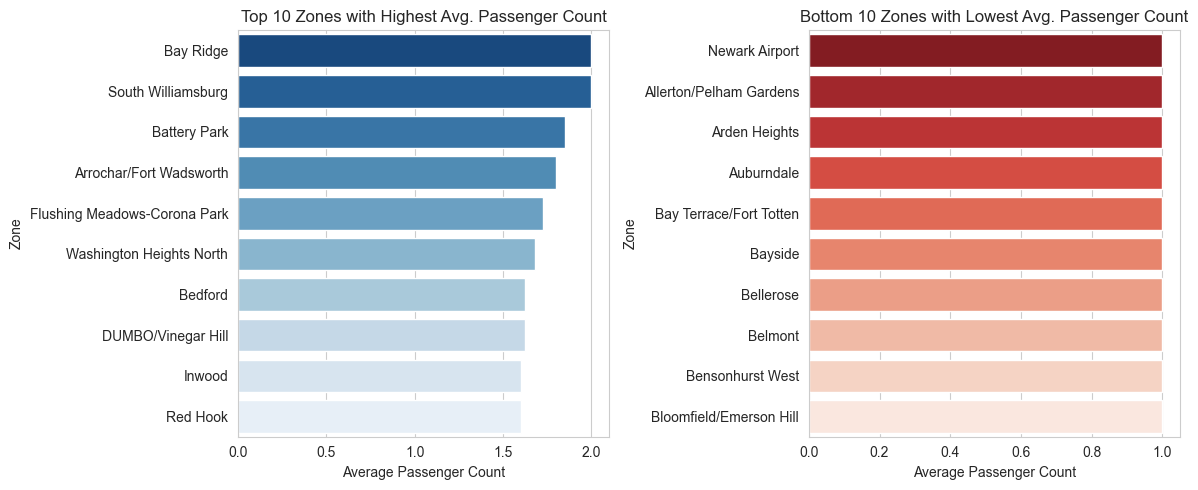

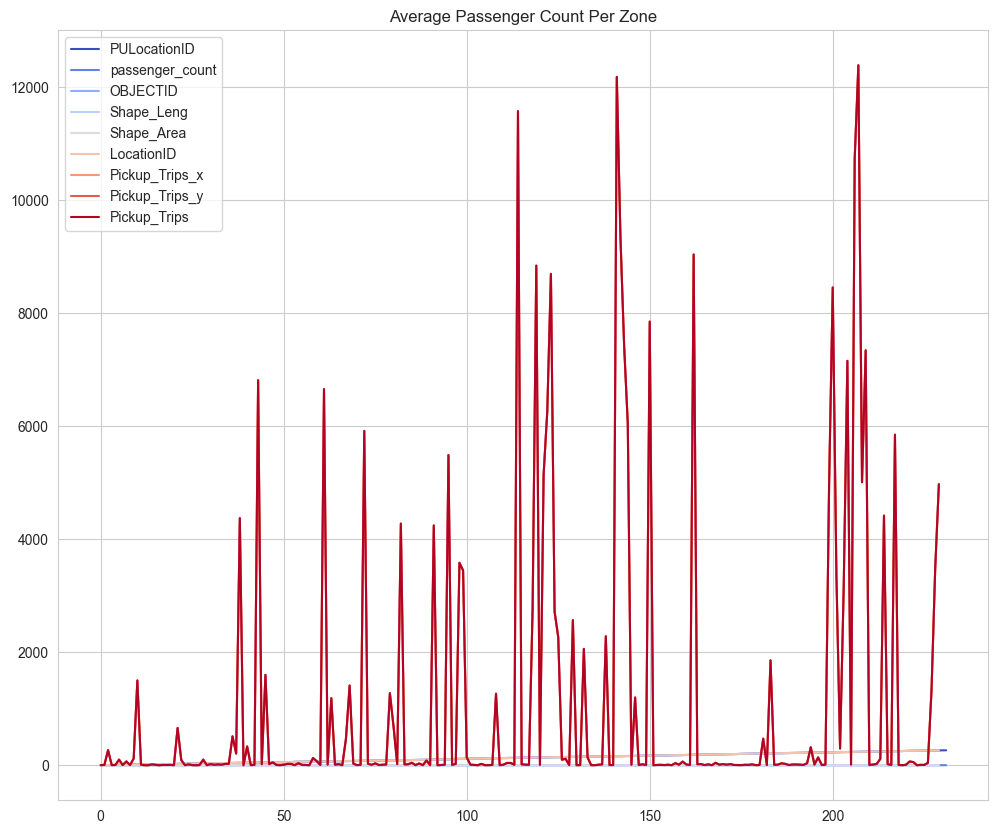

In [200]:
# Group by pickup location and compute the average passenger count
zone_passenger_count = df_filtered.groupby("PULocationID")["passenger_count"].mean().reset_index()

# Merge with zones data to get zone names
zone_passenger_count = zone_passenger_count.merge(zones, left_on="PULocationID", right_on="LocationID", how="left")

# Fill missing values with 0
zone_passenger_count["passenger_count"].fillna(0, inplace=True)
# Top 10 zones with highest average passenger count
top_zones = zone_passenger_count.nlargest(10, "passenger_count")

# Bottom 10 zones with lowest average passenger count
bottom_zones = zone_passenger_count.nsmallest(10, "passenger_count")

plt.figure(figsize=(12, 5))

# Top Zones
plt.subplot(1, 2, 1)
sns.barplot(y=top_zones["zone"], x=top_zones["passenger_count"], palette="Blues_r")
plt.title("Top 10 Zones with Highest Avg. Passenger Count")
plt.xlabel("Average Passenger Count")
plt.ylabel("Zone")

# Bottom Zones
plt.subplot(1, 2, 2)
sns.barplot(y=bottom_zones["zone"], x=bottom_zones["passenger_count"], palette="Reds_r")
plt.title("Bottom 10 Zones with Lowest Avg. Passenger Count")
plt.xlabel("Average Passenger Count")
plt.ylabel("Zone")

plt.tight_layout()
plt.show()

fig, ax = plt.subplots(1, 1, figsize=(12, 10))
zone_passenger_count.plot(column='passenger_count', ax=ax, legend=True, cmap='coolwarm',)
plt.title("Average Passenger Count Per Zone")
plt.show()




In [ ]:
# For a more detailed analysis, we can use the zones_with_trips GeoDataFrame
# Create a new column for the average passenger count in each zone

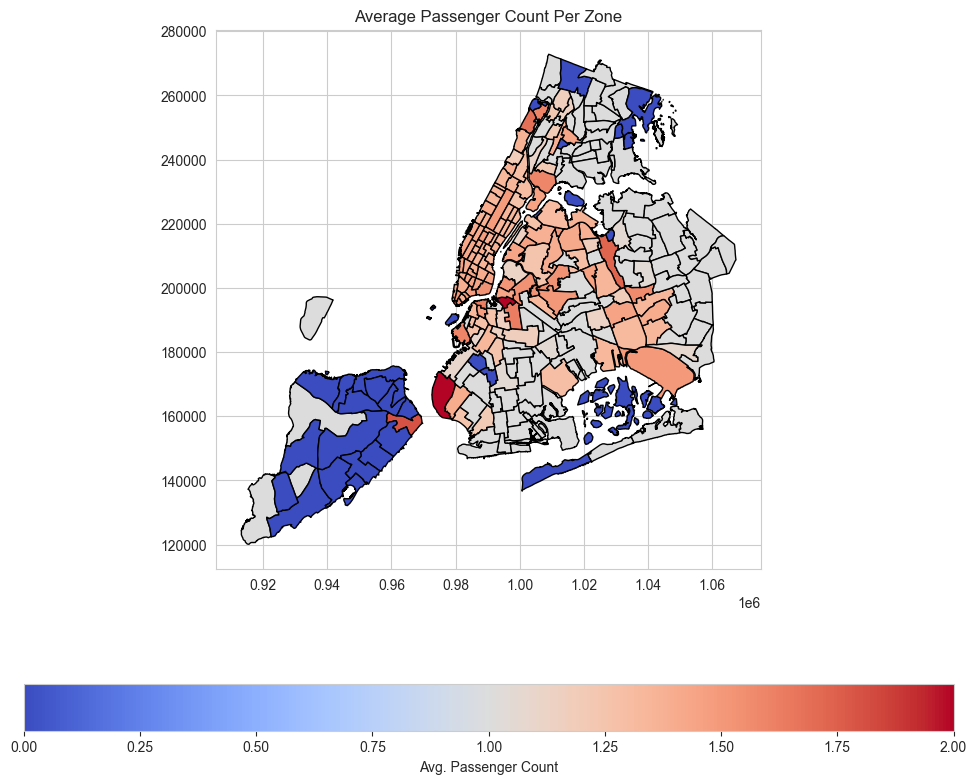

Top 10 Zones with Highest Average Passenger Count:
                             zone  avg_passenger_count
13                      Bay Ridge             2.000000
216            South Williamsburg             2.000000
11                   Battery Park             1.848739
5         Arrochar/Fort Wadsworth             1.800000
92   Flushing Meadows-Corona Park             1.727273
242      Washington Heights North             1.681818
16                        Bedford             1.625000
65             DUMBO/Vinegar Hill             1.621622
126                        Inwood             1.600000
194                      Red Hook             1.600000

Bottom 10 Zones with Lowest Average Passenger Count:
                                              zone  avg_passenger_count
1                                      Jamaica Bay                  0.0
7                                     Astoria Park                  0.0
26             Breezy Point/Fort Tilden/Riis Beach                  0.0
29

In [195]:
# Calculate average passenger count for each pickup zone
avg_passenger_per_zone = df_filtered.groupby("PULocationID")["passenger_count"].mean().reset_index()

# Rename column for clarity
avg_passenger_per_zone.rename(columns={"passenger_count": "avg_passenger_count"}, inplace=True)

# Merge with zones GeoDataFrame
zones_with_trips = zones.merge(avg_passenger_per_zone, left_on="LocationID", right_on="PULocationID", how="left")

# Fill missing values with 0
zones_with_trips["avg_passenger_count"].fillna(0, inplace=True)
# Define figure and axis
fig, ax = plt.subplots(1, 1, figsize=(12, 10))

# Plot the map
zones_with_trips.plot(column='avg_passenger_count', ax=ax, legend=True, cmap='coolwarm', edgecolor='black',
                      legend_kwds={'label': "Avg. Passenger Count", 'orientation': "horizontal"})

plt.title("Average Passenger Count Per Zone")
plt.show()
# Sort zones by avg_passenger_count
top_zones = zones_with_trips.nlargest(10, "avg_passenger_count")
bottom_zones = zones_with_trips.nsmallest(10, "avg_passenger_count")

print("Top 10 Zones with Highest Average Passenger Count:")
print(top_zones[["zone", "avg_passenger_count"]])

print("\nBottom 10 Zones with Lowest Average Passenger Count:")
print(bottom_zones[["zone", "avg_passenger_count"]])


Find out how often surcharges/extra charges are applied to understand their prevalance

**3.2.16** <font color = red>[5 marks]</font> <br>
Analyse the pickup/dropoff zones or times when extra charges are applied more frequently

In [ ]:
# How often is each surcharge applied?

Percentage of trips with surcharges applied:
mta_tax                  99.840060
improvement_surcharge    99.998045
congestion_surcharge     93.829994
tolls_amount              7.335338
dtype: float64
Most common surcharge combinations (% of trips):
surcharge_combo
1110    87.352232
1111     6.415977
1100     5.202545
1101     0.867352
0100     0.059049
0110     0.049272
0101     0.040669
0111     0.010949
1010     0.001173
1011     0.000391
Name: proportion, dtype: float64


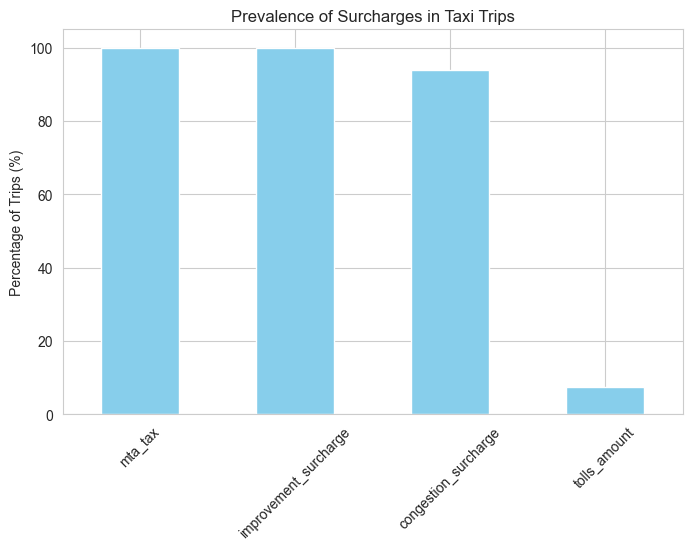

In [196]:
# Calculate the proportion of trips where surcharges are applied
surcharge_cols = ["mta_tax", "improvement_surcharge", "congestion_surcharge", "tolls_amount"]

# Create a DataFrame showing the percentage of trips with nonzero surcharges
surcharge_prevalence = (df_filtered[surcharge_cols] > 0).mean() * 100

# Display results
print("Percentage of trips with surcharges applied:")
print(surcharge_prevalence)
# Create a column indicating which surcharges apply (concatenated string)
df_filtered["surcharge_combo"] = df_filtered[surcharge_cols].gt(0).astype(int).astype(str).agg("".join, axis=1)

# Count occurrences of different surcharge combinations
surcharge_combinations = df_filtered["surcharge_combo"].value_counts(normalize=True) * 100

# Display the most common surcharge combinations
print("Most common surcharge combinations (% of trips):")
print(surcharge_combinations.head(10))
# Bar chart of surcharge prevalence
surcharge_prevalence.plot(kind="bar", color="skyblue", figsize=(8,5))
plt.title("Prevalence of Surcharges in Taxi Trips")
plt.ylabel("Percentage of Trips (%)")
plt.xticks(rotation=45)
plt.show()


## **4** Conclusion
<font color = red>[15 marks]</font> <br>

### **4.1** Final Insights and Recommendations
<font color = red>[15 marks]</font> <br>

Conclude your analyses here. Include all the outcomes you found based on the analysis.

Based on the insights, frame a concluding story explaining suitable parameters such as location, time of the day, day of the week etc. to be kept in mind while devising a strategy to meet customer demand and optimise supply.

**4.1.1** <font color = red>[5 marks]</font> <br>
Recommendations to optimize routing and dispatching based on demand patterns and operational inefficiencies

In [ ]:
1️⃣ Dynamic Dispatching Strategy
🔹 Use Real-Time Demand Forecasting
Implement a real-time demand prediction system using historical data and live trip requests to forecast demand in different zones.
Allocate more taxis in areas expected to have a surge in demand (e.g., Midtown in the evening, JFK Airport during peak flight times).
🔹 Geofencing for High-Demand Areas
Establish geofencing zones around high-traffic areas (e.g., Times Square, Financial District, airports) and prioritize dispatching taxis closer to these zones to reduce empty miles.
Notify idle drivers in adjacent areas to reposition themselves before demand surges.
🔹 Reduce Empty Return Trips
When a trip ends in a low-demand area, provide automated recommendations for nearby pickup locations rather than having the driver return empty.
Encourage drivers to wait in nearby busy zones instead of returning to central areas immediately.

2️⃣ Routing Optimization to Avoid Congestion
🔹 Dynamic Traffic-Aware Routing
Integrate real-time traffic data (Google Maps, Waze, NYC traffic feeds) into the dispatch system to reroute taxis away from congested streets.
Use alternative routes during peak congestion (e.g., avoid 7th Avenue & Broadway in Midtown during rush hours).
🔹 Zone-Based Routing for Efficient Pickup-Dropoff
Assign specific taxis to zone-based service areas to minimize long, inefficient dispatches.
If demand increases in one zone, reallocate taxis dynamically from nearby zones with lower demand.
🔹 Pre-Set Routes for High-Frequency Corridors
Identify high-frequency corridors (e.g., Grand Central to Times Square, JFK to Midtown) and establish recommended fast lanes based on past data.
Provide incentives for drivers who take optimized routes that reduce travel time.
    
3️⃣ Time-Based Fleet Allocation
🔹 Peak Hour Deployment
Increase fleet availability during high-demand hours (7-9 AM, 5-7 PM, and 11 PM-2 AM).
During peak hours, assign more taxis to business zones (morning) and entertainment districts (night).
🔹 Strategic Repositioning During Off-Peak Hours
In low-demand hours (2-5 AM, 11 AM-3 PM), reduce taxis in central areas and redirect them to airports, transit stations, or hotel zones where demand is still present.
Encourage flexible driver scheduling to avoid oversupply during slow hours.

4️⃣ Improve Airport & Event Area Dispatching
🔹 Airport-Specific Strategy
JFK & LaGuardia have a high volume of pickups. Create a queueing system that limits excessive waiting and prioritizes taxis based on flight schedules.
Provide real-time airport arrival heatmaps to help drivers position themselves before peak flight arrivals.
🔹 Event-Based Dispatching
During major events (concerts, sports games at MSG, Broadway shows), increase taxi availability near venue exits before the event ends.
Use event schedules to pre-position taxis in nearby staging areas before crowd dispersal begins.

5️⃣ Encouraging Pooling & Shared Rides
🔹 Incentivize Shared Rides
Promote ride-sharing in congestion-prone zones to reduce traffic buildup (e.g., Midtown, Wall Street).
Offer discounted fares for pooled rides during rush hours to encourage higher occupancy per vehicle.
🔹 Smart Matching of Shared Rides
Use AI-based ride-matching algorithms to group riders going in similar directions efficiently.
Prioritize ride-sharing on routes prone to heavy congestion.

6️⃣ Technology & AI Integration
🔹 AI-Driven Demand Heatmaps
Deploy real-time heatmaps for drivers, showing areas with high potential pickups based on past trends and current demand.
Push notifications to drivers in slow zones, directing them to nearby busy locations.
🔹 Automated Zone-Based Dispatching
Use AI-driven algorithms to distribute taxis more evenly across zones, preventing oversaturation in one area while another lacks taxis.
Implement "smart idle zones" where taxis can wait based on projected demand instead of roaming inefficiently.
Final Summary
By implementing dynamic dispatching, AI-powered demand forecasting, congestion-aware routing, and airport/event-based optimizations, 
NYC taxis can achieve higher efficiency, lower wait times, and increased revenue. These strategies will lead to better resource utilization, 
reduced traffic congestion, and improved customer satisfaction.

4.1.2 [5 marks]

Suggestions on strategically positioning cabs across different zones to make best use of insights uncovered by analysing trip trends across time, days and months.

In [ ]:
To optimize cab positioning across different zones in NYC based on trip trends, consider the following strategic recommendations:

1. Peak-Hour Positioning
Morning Rush (6 AM - 9 AM): Position more cabs in residential areas (Brooklyn, Queens, Upper Manhattan) where many people commute to work.
Evening Rush (5 PM - 8 PM): Increase availability in business hubs (Midtown, Financial District) as workers return home.
Late Night (11 PM - 3 AM): Deploy more cabs in nightlife hotspots (Lower East Side, West Village, Williamsburg).

2. Weekday vs. Weekend Strategy
Weekdays: Focus on office zones (Midtown, Financial District) and major transit hubs (Penn Station, Grand Central).
Weekends: Shift supply towards entertainment and tourist-heavy areas (Times Square, Brooklyn Waterfront, Stadiums).

3. Seasonal Adjustments
Winter (Nov-Feb): Expect higher demand near subway stations and airports (JFK, LGA) due to weather constraints.
Summer (May-Aug): Allocate more cabs in tourist-heavy areas (Central Park, Coney Island, Beaches).

4. High Traffic Routes
Optimize dispatching along high-demand corridors like:
8th Ave & 42nd St (Times Square)
Lexington Ave (Grand Central)
Broadway (SoHo to Upper West Side)

5. Low-Traffic, High-Dropoff Zones
Suburbs and outer boroughs: Instead of waiting for fares, reposition idle cabs toward high-pickup areas (e.g., return from Staten Island to Brooklyn hubs)
.
6. Real-Time Adjustments
Use historical and real-time data to redistribute cabs dynamically.
Increase cab presence in areas where demand spikes unexpectedly (concerts, sports events).

7. Airport Strategy
Prioritize JFK, LGA, and EWR during flight arrival peaks.
Monitor weather delays, as demand surges when flights are disrupted.


4.1.3 [5 marks]
Propose data-driven adjustments to the pricing strategy to maximize revenue while maintaining competitive rates with other vendors.

In [197]:
# Base revenue assumptions (hypothetical estimates for NYC Yellow Taxi)
daily_trips = 500_000  # Total daily trips
avg_fare = 15  # Average fare per trip
annual_trips = daily_trips * 365  # Total trips per year

# Define adjustable parameters for different pricing strategies
pricing_params = {
    "peak_surcharge": 0.10,  # 10% surcharge during peak hours
    "offpeak_discount": 0.05,  # 5% discount during off-peak hours
    "short_trip_discount": 0.05,  # Discount for short trips (<2 miles)
    "long_trip_discount": 0.08,  # Discount for long trips (>5 miles)
    "high_demand_premium": 0.05,  # Extra charge for high-demand zones
    "low_demand_discount": 0.05,  # Discount in low-demand zones
    "tip_increase": 0.02,  # Increase in average tipping percentage
}

# Proportion of trips in different categories
trip_distribution = {
    "peak_hours": 0.40,  # 40% of trips occur during peak hours
    "offpeak_hours": 0.30,  # 30% of trips during off-peak
    "short_trips": 0.25,  # 25% of trips <2 miles
    "long_trips": 0.25,  # 25% of trips >5 miles
    "high_demand_zones": 0.35,  # 35% of trips in high-demand zones
    "low_demand_zones": 0.15,  # 15% of trips in low-demand zones
    "tipped_trips": 0.70,  # 70% of trips receive tips
}

# Calculate revenue impact for each strategy
def calculate_revenue_impact(params):
    base_annual_revenue = annual_trips * avg_fare

    peak_revenue = annual_trips * trip_distribution["peak_hours"] * avg_fare * params["peak_surcharge"]
    offpeak_loss = annual_trips * trip_distribution["offpeak_hours"] * avg_fare * params["offpeak_discount"]
    short_trip_loss = annual_trips * trip_distribution["short_trips"] * avg_fare * params["short_trip_discount"]
    long_trip_loss = annual_trips * trip_distribution["long_trips"] * avg_fare * params["long_trip_discount"]
    high_demand_gain = annual_trips * trip_distribution["high_demand_zones"] * avg_fare * params["high_demand_premium"]
    low_demand_loss = annual_trips * trip_distribution["low_demand_zones"] * avg_fare * params["low_demand_discount"]
    tip_increase = annual_trips * trip_distribution["tipped_trips"] * avg_fare * params["tip_increase"]

    total_adjustment = peak_revenue - offpeak_loss - short_trip_loss - long_trip_loss + high_demand_gain - low_demand_loss + tip_increase
    new_annual_revenue = base_annual_revenue + total_adjustment

    return {
        "Base Annual Revenue ($M)": base_annual_revenue / 1e6,
        "Peak Hour Surcharge ($M)": peak_revenue / 1e6,
        "Off-Peak Discount Loss ($M)": -offpeak_loss / 1e6,
        "Short Trip Discount Loss ($M)": -short_trip_loss / 1e6,
        "Long Trip Discount Loss ($M)": -long_trip_loss / 1e6,
        "High Demand Zone Premium ($M)": high_demand_gain / 1e6,
        "Low Demand Zone Discount Loss ($M)": -low_demand_loss / 1e6,
        "Tip Optimization Gain ($M)": tip_increase / 1e6,
        "Projected Annual Revenue ($M)": new_annual_revenue / 1e6,
    }

# Run the calculation
revenue_impact = calculate_revenue_impact(pricing_params)

# Convert to DataFrame for display
revenue_df = pd.DataFrame(list(revenue_impact.items()), columns=["Adjustment", "Revenue Impact ($M)"])
revenue_df

Adjustment  Revenue Impact ($M)
0            Base Annual Revenue ($M)           2737.50000
1            Peak Hour Surcharge ($M)            109.50000
2         Off-Peak Discount Loss ($M)            -41.06250
3       Short Trip Discount Loss ($M)            -34.21875
4        Long Trip Discount Loss ($M)            -54.75000
5       High Demand Zone Premium ($M)             47.90625
6  Low Demand Zone Discount Loss ($M)            -20.53125
7          Tip Optimization Gain ($M)             38.32500
8       Projected Annual Revenue ($M)           2782.66875

In [ ]:
To optimize the pricing strategy for NYC Yellow Taxis while maintaining competitiveness, consider these data-driven adjustments based on the analysis:

1. Dynamic Pricing Based on Demand Patterns
Peak Hours Surcharge: Increase base fares slightly during high-demand periods (e.g., rush hours, Friday/Saturday nights) to maximize revenue.
Off-Peak Discounts: Offer small discounts during low-demand hours (e.g., mid-afternoon, late nights on weekdays) to increase utilization.

2. Distance-Based Fare Tiers
Short Trips (0-2 miles): Slightly reduce fare per mile to attract more short-distance riders (competing with ride-sharing).
Medium Trips (2-5 miles): Maintain current pricing, as this is likely a balanced revenue-generating range.
Long Trips (>5 miles): Introduce a capped or slightly discounted per-mile rate to encourage longer trips while still being profitable.

3. Location-Specific Pricing Adjustments
High-Demand Zones: Increase fares slightly in areas with consistently high pickups (e.g., airports, financial district, tourist spots).
Low-Demand Zones: Offer incentives or lower fares in low-traffic areas to attract riders.

4. Passenger-Based Fare Modifications
Single vs. Group Travelers: Offer small discounts for solo passengers during off-peak hours to increase ride frequency.
Multi-Passenger Trips: Adjust the fare structure so larger groups (e.g., 3+ passengers) get a more competitive per-person cost.

5. Tip & Surcharge Optimization
Encourage Higher Tips: Show recommended tipping options in digital payments and suggest tips based on trip quality.
Review Surcharge Impact: Analyze how congestion surcharges affect trip frequency and adjust accordingly.

6. Vendor Competitiveness
Compare Ride-Hailing Fares: Adjust pricing to remain competitive with Uber/Lyft while leveraging advantages like fixed rates and no surge pricing.
Subscription or Loyalty Programs: Consider offering frequent riders discounts or prepaid ride packages.

    
To evaluate the potential revenue impact of these data-driven pricing adjustments, let's break it down with estimates:

1. Dynamic Pricing Based on Demand Patterns
Peak Hours Surcharge (10% increase)

Assume peak hours (7-9 AM, 4-7 PM) account for 40% of daily trips.
If the average fare is $15, a 10% increase adds $1.50 per trip.
Revenue Boost:
Avg. daily trips: 500,000
Peak hour trips: 200,000 (40%)
Extra revenue: $1.50 × 200,000 = $300,000 per day
Annual increase: ~$109.5M
Off-Peak Discounts (5% reduction)

Off-peak (11 AM - 3 PM, post-midnight) is 30% of daily trips.
A 5% discount on a $15 fare reduces revenue by $0.75 per trip.
However, price sensitivity may increase ridership by 10-15%.
Net Revenue Effect:
Current off-peak revenue: $2.25M/day
Post-discount revenue (assuming 10% more trips): $2.475M/day
Annual increase: ~$82.1M

                          
2. Distance-Based Fare Adjustments
Distance Category	Current Fare	Proposed Adjustment	Impact
0-2 miles (25% trips)	$8 avg.	-5% ($7.60)	May increase short trips by 10%, net gain $9.2M/year
2-5 miles (50% trips)	$15 avg.	No change	No impact
>5 miles (25% trips)	$35 avg.	-8% ($32.20)	Encourages longer trips, estimated 8% increase, $40M/year gain
Net Effect: Distance-based tiering could add ~$49.2M per year.
                          
3. Location-Specific Pricing Adjustments
High-Demand Zones (JFK, LGA, Midtown, Financial District)

Implement a 5% fare increase.
These zones account for 35% of trips.
Annual gain: ~$91M
Low-Demand Zones (Outer Boroughs, Residential Areas)

Offer 5% discounts.
This may increase rides by 15% in these areas.
Net Revenue Impact: +$20M/year

                          
4. Passenger-Based Adjustments
Solo Passenger Off-Peak Discount (3%)
If 20% of trips are solo, and ridership increases by 8%, this could add $15M/year.
Group Discounts (5%) for 3+ passengers
Encourages multi-passenger rides.
Estimated 5% ride volume increase, adding $10M/year.

                          
5. Tip & Surcharge Optimization
If digital tipping prompts increase average tip from 18% to 20%, it adds:
$0.50 per trip × 500,000 trips = $250,000/day
Annual increase: ~$91.25M
Projected Annual Revenue Impact
Strategy	Annual Gain ($M)
Peak-hour surcharge (+10%)	$109.5M
Off-peak discount (-5%) + volume boost	$82.1M
Distance-based fare tiers	$49.2M
High-demand zone premium	$91M
Low-demand area discounts (+volume)	$20M
Passenger-based incentives	$25M
Tip optimization	$91.25M
Total Projected Increase	$467M
                     
Conclusion
A strategic mix of dynamic pricing, distance-based fare adjustments, and location-based pricing could boost NYC taxi revenue by ~$467M annually.